# Project: Analysing London Airbnb Economy
## Summary
This is my Data Science project at City University of London.
In this project, we will
* Analyze Airbnb listings that have the most influence on customer behavior.
* Discover new ways to analyze performance of London Airbnbs.
* Compare different areas of London to find highest-performing boroughs.

## Objectives
The analytical objectives are:
* Extract data from Inside Airbnb.
* Manipulate data using Python programming.
* Create new features for Airbnb performance analysis.
* Develop visualizations to compare Airbnb performance in different areas of London.
* Compare predictive Machine Learning models on Airbnb performance.

## Step 1: Load Data and Initial EDA

* The dataset containing Airbnb listing characteristics is sourced from the third-party website Inside Airbnb. Inside Airbnb is a non-commercial entity that collects publicly available data from the Airbnb website. This data is made accessible to encourage scientific discussion about the Airbnb market. (Cox, 2020). 

In [1]:
# Basic imports
import pandas as pd
import numpy as np
import math
import ast
from scipy import stats

# Visuals imports
import seaborn as sns
import matplotlib.pyplot as plt

# Mapping imports
import folium as fm
from folium.plugins import FastMarkerCluster
from folium.plugins import MarkerCluster
import geopandas as gpd
from branca.colormap import LinearColormap

# ML modelling imports
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

listings_df = pd.read_csv("listings.csv")

In [2]:
# Identify unique values for each column
listings_df.nunique(axis=0).sort_values()

license                             0
neighbourhood_group_cleansed        0
calendar_updated                    0
scrape_id                           1
neighbourhood                       1
                                ...  
description                     82214
amenities                       85821
name                            92377
picture_url                     93706
listing_url                     96182
Length: 75, dtype: int64

In [3]:
# Check for proportion of missing values for all columns
round(listings_df.isna().sum().sort_values(ascending=False) / len(listings_df), 3)

neighbourhood_group_cleansed    1.000
license                         1.000
calendar_updated                1.000
neighborhood_overview           0.525
neighbourhood                   0.525
                                ...  
minimum_nights                  0.000
room_type                       0.000
amenities                       0.000
accommodates                    0.000
id                              0.000
Length: 75, dtype: float64

In [4]:
# listings_df.to_csv("listings_cleaned.csv")
# listings_df = pd.read_csv("listings_cleaned.csv")

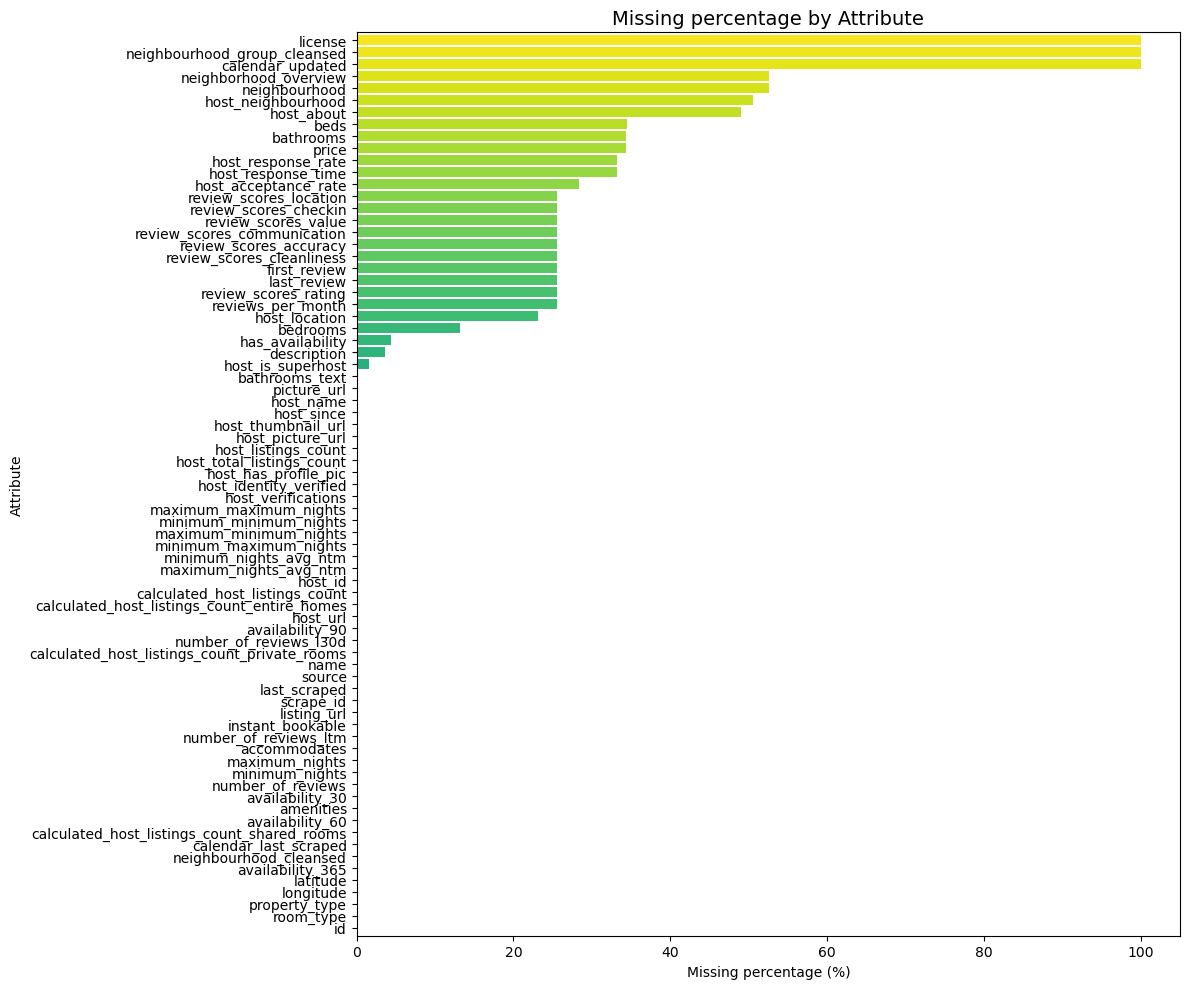

In [5]:
# Calculate the percentage of missing values for each feature
null_percentage = listings_df.isnull().mean().sort_values(ascending=True) * 100

# Create  bar chart 
plt.figure(figsize=(12, 10))
colors = sns.color_palette("viridis", len(null_percentage))
null_percentage.plot(kind='barh', color=colors, edgecolor='none', width=0.8)
plt.title('Missing percentage by Attribute', fontsize=14)
plt.xlabel('Missing percentage (%)')
plt.ylabel('Attribute')
plt.gca().yaxis.set_tick_params(labelsize=10) 
plt.tight_layout()
plt.show()

In [6]:
display(listings_df.head())

id                         listing_url     scrape_id last_scraped  \
0  13913.0  https://www.airbnb.com/rooms/13913  2.020000e+13     9/6/2024   
1  15400.0  https://www.airbnb.com/rooms/15400  2.020000e+13     9/7/2024   
2  17402.0  https://www.airbnb.com/rooms/17402  2.020000e+13     9/7/2024   
3  24328.0  https://www.airbnb.com/rooms/24328  2.020000e+13     9/7/2024   
4  33332.0  https://www.airbnb.com/rooms/33332  2.020000e+13     9/6/2024   

        source                                               name  \
0  city scrape                Holiday London DB Room Let-on going   
1  city scrape                Bright Chelsea  Apartment. Chelsea!   
2  city scrape                 Fab 3-Bed/2 Bath & Wifi: Trendy W1   
3  city scrape  Battersea live/work artist house, garden & par...   
4  city scrape     Beautiful Ensuite Richmond-upon-Thames borough   

                                         description  \
0  My bright double bedroom with a large window h...   
1  Lots of windows and light.  St Luke's Gardens ...   
2  You'll have a great time in this beautiful, cl...   
3  Artist house, bright high ceiling rooms for bo...   
4  Walking distance to Twickenham Stadium, 35 min...   

                               neighborhood_overview  \
0  Finsbury Park is a friendly melting pot commun...   
1                                     It is Chelsea.   
2  Fitzrovia is a very desirable trendy, arty and...   
3  - Battersea is a quiet family area, easy acces...   
4                             Peaceful and friendly.   

                                         picture_url  host_id  ...  \
0  https://a0.muscache.com/pictures/miso/Hosting-...    54730  ...   
1  https://a0.muscache.com/pictures/428392/462d26...    60302  ...   
2  https://a0.muscache.com/pictures/39d5309d-fba7...    67564  ...   
3  https://a0.muscache.com/pictures/9194b40f-c627...    41759  ...   
4  https://a0.muscache.com/pictures/miso/Hosting-...   144444  ...   

  review_scores_communication review_scores_location review_scores_value  \
0                        4.84                   4.72                4.72   
1                        4.84                   4.93                4.75   
2                        4.72                   4.89                4.61   
3                        4.93                   4.59                4.65   
4                        4.50                   4.67                4.22   

  license instant_bookable calculated_host_listings_count  \
0     NaN                f                              3   
1     NaN                f                              1   
2     NaN                f                              6   
3     NaN                f                              1   
4     NaN                f                              2   

  calculated_host_listings_count_entire_homes  \
0                                           2   
1                                           1   
2                                           6   
3                                           1   
4                                           0   

  calculated_host_listings_count_private_rooms  \
0                                            1   
1                                            0   
2                                            0   
3                                            0   
4                                            2   

  calculated_host_listings_count_shared_rooms reviews_per_month  
0                                           0              0.26  
1                                           0              0.54  
2                                           0              0.34  
3                                           0              0.56  
4                                           0              0.11  

[5 rows x 75 columns]

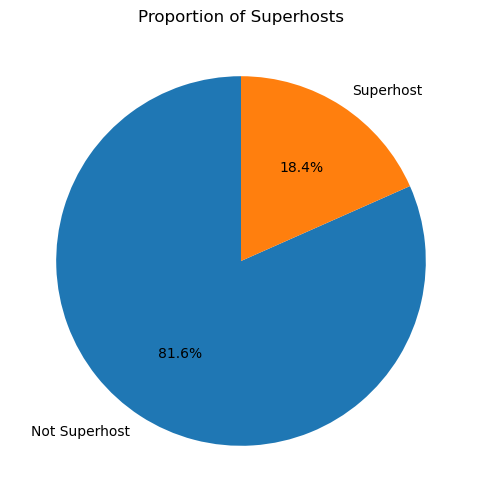

In [7]:
# Proportion of super hosts
superhost_counts = listings_df['host_is_superhost'].value_counts()
plt.figure(figsize=(6, 6))
superhost_counts.plot(kind='pie', autopct='%1.1f%%', labels=['Not Superhost', 'Superhost'], startangle=90)
plt.title("Proportion of Superhosts")
plt.ylabel('')
plt.show()

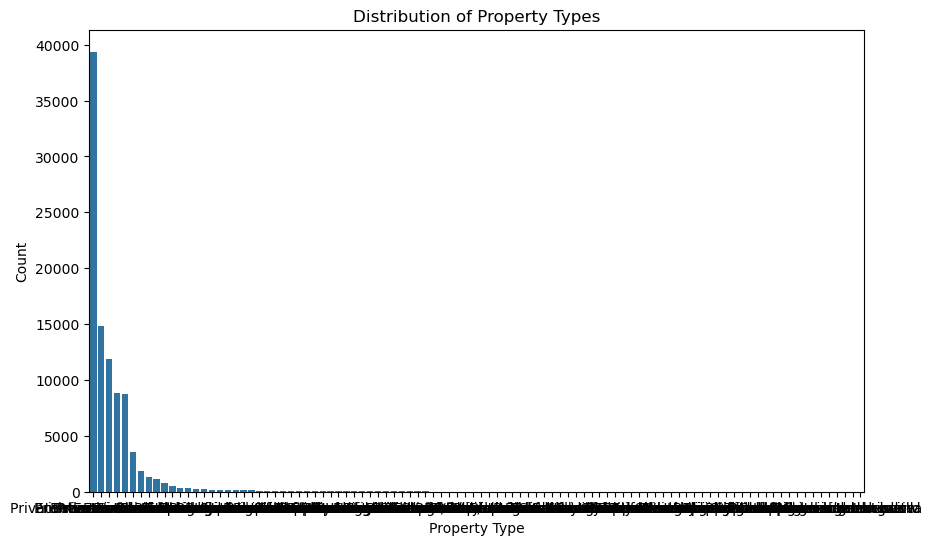

In [8]:
# Distribution of property types (from kaggle)
plt.figure(figsize=(10, 6))
sns.countplot(data=listings_df, x='property_type', order=listings_df['property_type'].value_counts().index)
plt.title('Distribution of Property Types')
plt.xlabel('Property Type')
plt.ylabel('Count')
plt.show()

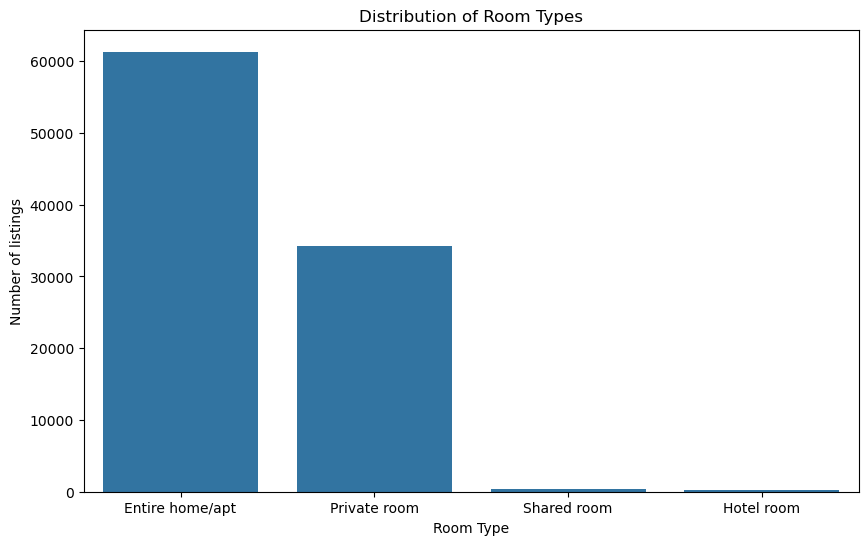

In [9]:
# Distribution of room types (from kaggle)
plt.figure(figsize=(10, 6))
sns.countplot(data=listings_df, x='room_type', order=listings_df['room_type'].value_counts().index)
plt.title('Distribution of Room Types')
plt.xlabel('Room Type')
plt.ylabel('Number of listings')
plt.show()

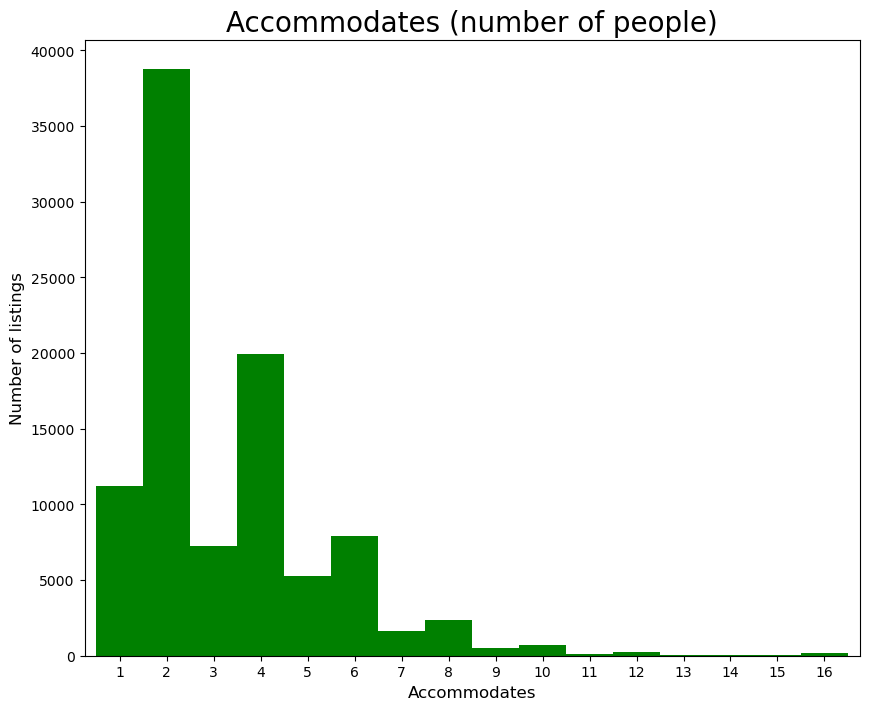

In [10]:
# Distribution of accommodation size counts
fig=listings_df['accommodates'].value_counts().sort_index()
fig.plot.bar(figsize=(10, 8), width=1, rot=0, color='green')
plt.title("Accommodates (number of people)", fontsize=20)
plt.ylabel('Number of listings', fontsize=12)
plt.xlabel('Accommodates', fontsize=12)
plt.show()

In [11]:
listings_df[['longitude','latitude']].isna().sum()

longitude    0
latitude     0
dtype: int64

In [12]:
print(f"Max longitude: {listings_df.longitude.max()}")
print(f"Min longitude: {listings_df.longitude.min()}")
print(f"Max latitude: {listings_df.latitude.max()}")
print(f"Min latitude: {listings_df.latitude.min()}")

Max longitude: 0.295730692
Min longitude: -0.4978
Max latitude: 51.6816423
Min latitude: 51.295937


In [13]:
lats2024 = listings_df['latitude'].tolist()
lons2024 = listings_df['longitude'].tolist()
locations = list(zip(lats2024, lons2024))

map1 = fm.Map(location=[51.495, -0.102], zoom_start=11.5)
FastMarkerCluster(data=locations).add_to(map1)
map1

In [14]:
# Reformat 'price' datatype using (Regex)
listings_df['price'] = listings_df['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)

<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
C:\Users\nixon\AppData\Local\Temp\ipykernel_39264\275587579.py:2: SyntaxWarning: invalid escape sequence '\$'
  listings_df['price'] = listings_df['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)


C:\Users\nixon\AppData\Local\Temp\ipykernel_39264\608991691.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='price', y='neighbourhood_cleansed', data=feq_df, palette='viridis', width=1)


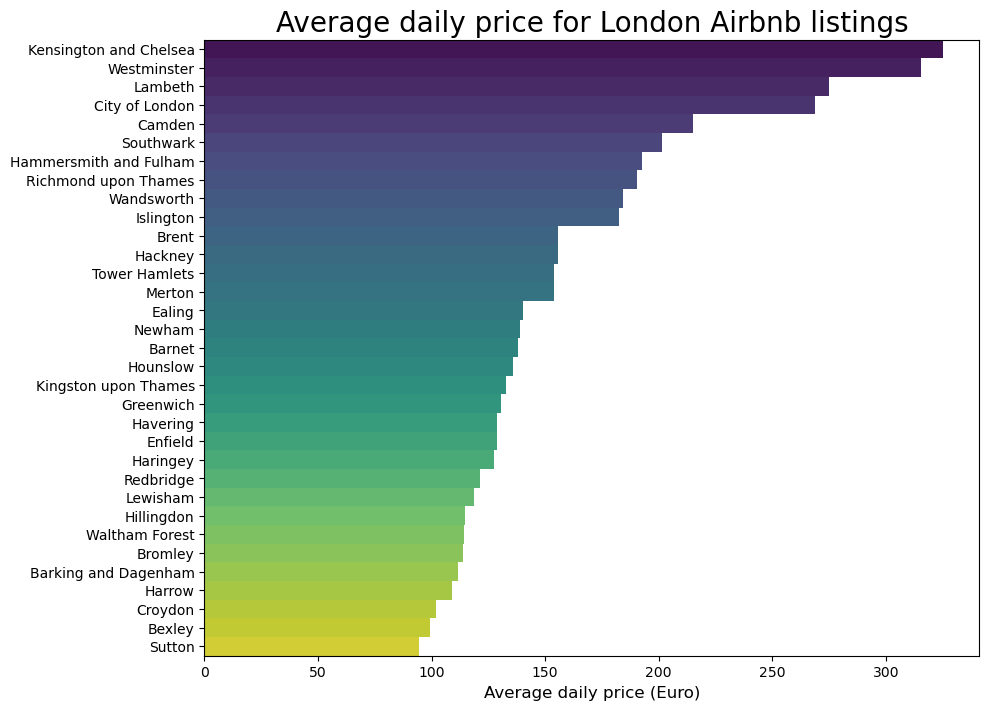

In [15]:
# Group by neighbourhood_cleansed and calculate the mean price
feq = listings_df.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending=False)
feq_df = feq.reset_index()

# Create bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x='price', y='neighbourhood_cleansed', data=feq_df, palette='viridis', width=1)
plt.title("Average daily price for London Airbnb listings", fontsize=20)
plt.xlabel('Average daily price (Euro)', fontsize=12)
plt.ylabel("")
plt.show()

C:\Users\nixon\AppData\Local\Temp\ipykernel_39264\648351519.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='neighbourhood_cleansed', y='price', data=feq_df, palette='viridis', ax=ax1)


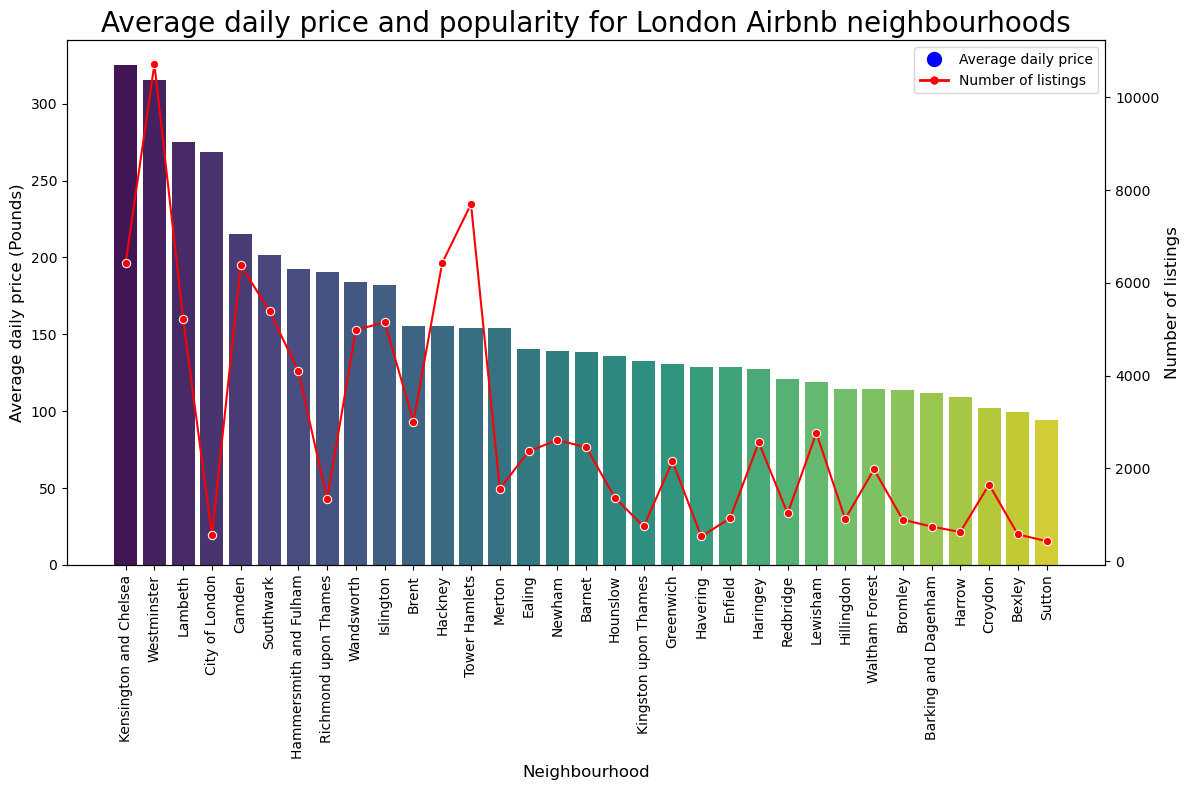

In [16]:
# Group by neighbourhood_cleansed and calculate the mean price and count of rows
feq3 = listings_df.groupby('neighbourhood_cleansed').agg({'price': 'mean', 'neighbourhood_cleansed': 'count'}).sort_values('price', ascending=False)
feq3.rename(columns={'neighbourhood_cleansed': 'count'}, inplace=True)

# Convert the DataFrame for easier plotting with seaborn
feq_df = feq3.reset_index()

# Create the plot
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot the average daily price as a bar plot
bar_plot = sns.barplot(x='neighbourhood_cleansed', y='price', data=feq_df, palette='viridis', ax=ax1)
ax1.set_title("Average daily price and popularity for London Airbnb neighbourhoods", fontsize=20)
ax1.set_xlabel('Neighbourhood', fontsize=12)
ax1.set_ylabel('Average daily price (Pounds)', fontsize=12)
ax1.tick_params(axis='x', rotation=90)

# Create a second y-axis to plot the count of rows (Reference: OpenAI. (2024). ChatGPT (Mar 14 version) [GPT-4o]. https://chat.openai.com/chat)
ax2 = ax1.twinx()
line_plot = sns.lineplot(x='neighbourhood_cleansed', y='count', data=feq_df, color='red', marker='o', ax=ax2)
ax2.set_ylabel('Number of listings', fontsize=12)
ax2.grid(False)

# Create custom legend
bar_plot_patch = plt.Line2D([0], [0], color='blue', marker='o', linestyle='-', linewidth=0, markersize=10, label='Average daily price')
line_plot_patch = plt.Line2D([0], [0], color='red', marker='o', linestyle='-', linewidth=2, markersize=5, label='Number of listings')
ax1.legend(handles=[bar_plot_patch, line_plot_patch], loc='upper right')

plt.tight_layout()
plt.show()

In [17]:
lond = gpd.read_file("neighbourhoods.geojson") # Reference: Kaggle (https://www.kaggle.com/code/erikbruin/airbnb-the-amsterdam-story-with-interactive-maps/notebook)
feq = pd.DataFrame([feq])
feq = feq.transpose()
lond = pd.merge(lond, feq, left_on='neighbourhood', right_on='neighbourhood_cleansed', how='left')
lond.rename(columns={'price': 'average_price'}, inplace=True)
lond.average_price = lond.average_price.round(decimals=0)

map_dict = lond.set_index('neighbourhood')['average_price'].to_dict()
color_scale = LinearColormap(['yellow','red'], vmin = min(map_dict.values()), vmax = max(map_dict.values()))

def get_color(feature):
    value = map_dict.get(feature['properties']['neighbourhood'])
    return color_scale(value)

map3 = fm.Map(location=[51.495, -0.102], zoom_start=11)
fm.GeoJson(data=lond,
               name='London',
               tooltip=fm.features.GeoJsonTooltip(fields=['neighbourhood', 'average_price'],
                                                      labels=True,
                                                      sticky=False),
               style_function= lambda feature: {
                   'fillColor': get_color(feature),
                   'color': 'black',
                   'weight': 1,
                   'dashArray': '5, 5',
                   'fillOpacity':0.5
                   },
               highlight_function=lambda feature: {'weight':3, 'fillColor': get_color(feature), 'fillOpacity': 0.8}).add_to(map3)
map3

## Step 2: Data Preprocessing Steps:
* 1. Check for duplicates
* 2. Drop features that are irrelevant or have high % data
* 3. Check for datatype mismatch and fix structure
* 4. Handle missing data
    * Fill in missing column values if important and low % missing 
    * Drop rows of data where information can't be retrieved

### 1. Check for duplicates

In [18]:
# Check for duplicate rows
len(listings_df) - len(listings_df.drop_duplicates())

0

### 2a. Drop missing features with 100% missing (N/A) values

In [19]:
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96182 entries, 0 to 96181
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            96182 non-null  float64
 1   listing_url                                   96182 non-null  object 
 2   scrape_id                                     96182 non-null  float64
 3   last_scraped                                  96182 non-null  object 
 4   source                                        96182 non-null  object 
 5   name                                          96182 non-null  object 
 6   description                                   92763 non-null  object 
 7   neighborhood_overview                         45661 non-null  object 
 8   picture_url                                   96171 non-null  object 
 9   host_id                                       96182 non-null 

In [20]:
# Drop 100% missing rows
listings_df = listings_df.drop(columns = ['neighbourhood_group_cleansed','calendar_updated','license'])
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96182 entries, 0 to 96181
Data columns (total 72 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            96182 non-null  float64
 1   listing_url                                   96182 non-null  object 
 2   scrape_id                                     96182 non-null  float64
 3   last_scraped                                  96182 non-null  object 
 4   source                                        96182 non-null  object 
 5   name                                          96182 non-null  object 
 6   description                                   92763 non-null  object 
 7   neighborhood_overview                         45661 non-null  object 
 8   picture_url                                   96171 non-null  object 
 9   host_id                                       96182 non-null 

### 2b. Drop irrelevant features, features with high % missing values

In [21]:
listings_df['host_about'].nunique()

24714

In [22]:
listings_df[['neighborhood_overview','neighbourhood','host_neighbourhood','host_about']].sample(5)

neighborhood_overview            neighbourhood host_neighbourhood  \
87793                   NaN                      NaN                NaN   
69206                   NaN                      NaN   Harringay Ladder   
58291     Wimbledon village  Neighborhood highlights                NaN   
40462                   NaN                      NaN                NaN   
92015                   NaN                      NaN          Nine Elms   

                                              host_about  
87793  Im a very chilled and relaxed person.  I work ...  
69206                                                NaN  
58291                                                NaN  
40462  I live with my wonderful husband in a cosy gar...  
92015  StarHost Residences offer serviced accommodati...

In [23]:
listings_df.isna().sum().sort_values(ascending=False)

neighborhood_overview    50521
neighbourhood            50520
host_neighbourhood       48557
host_about               47147
beds                     33141
                         ...  
room_type                    0
accommodates                 0
listing_url                  0
amenities                    0
id                           0
Length: 72, dtype: int64

In [24]:
display(listings_df.loc[:,["host_neighbourhood","neighbourhood_cleansed"]])

host_neighbourhood  neighbourhood_cleansed
0        LB of Islington               Islington
1                Chelsea  Kensington and Chelsea
2              Fitzrovia             Westminster
3              Battersea              Wandsworth
4         LB of Hounslow    Richmond upon Thames
...                  ...                     ...
96177                NaN                 Hackney
96178                NaN                  Merton
96179                NaN  Hammersmith and Fulham
96180                NaN    Kingston upon Thames
96181                NaN          Waltham Forest

[96182 rows x 2 columns]

**host_neighbourhood** can be removed as neighbourhood_cleansed is the cleaned version of that feature.

**host_total_listings_count** to be removed as host_listings_count is more relevant as to reflect the current number of listings that hosts are managing instead of what was managed in the past.

Remove minimum_maximum_nights and other constituents, availability columns except availability_365, number_of_reviews_ltm and number_of_reviews_l30d

A lodging that 
is available for a long time period will normally receive more reviews (Zhang et al., 2019). The measure 
‘reviews_per_month’ is more suitable, since it normalizes the number of reviews to the number of 
months the lodging is made available by the host. 
* Kirkos (2022)

In [25]:
zero_avai_df = listings_df.loc[listings_df['availability_365'] == 0]
high_avai_df = listings_df.loc[listings_df['availability_365'] >= 183]
low_avai_df = listings_df.loc[listings_df['availability_365'] < 182]
display(zero_avai_df.head())
display(high_avai_df.head())
display(low_avai_df.head())

id                          listing_url     scrape_id last_scraped  \
8   127860.0  https://www.airbnb.com/rooms/127860  2.020000e+13    9/10/2024   
18   39387.0   https://www.airbnb.com/rooms/39387  2.020000e+13    9/10/2024   
23  152863.0  https://www.airbnb.com/rooms/152863  2.020000e+13    9/10/2024   
24  154221.0  https://www.airbnb.com/rooms/154221  2.020000e+13    9/10/2024   
28   41509.0   https://www.airbnb.com/rooms/41509  2.020000e+13    9/10/2024   

             source                                               name  \
8   previous scrape  Double bedroom in cottage Twickenham (sleeps 1-2)   
18  previous scrape           Stylish bedsit in Notting Hill ish flat.   
23  previous scrape       Spacious 2-bed Muswell Hill garden apartment   
24  previous scrape                  great location absolutely central   
28  previous scrape                     Room in maisonette in chiswick   

                                          description  \
8   One gorgeous, light-filled double bedroom (sle...   
18  Private lockable bedsit room available within ...   
23  Modern two bedroom, extremely spacious (950 sq...   
24  hi, i am renting my 2 bedroom flat in Pimlico ...   
28  Double bed on 1st floor. 2 extra single beds i...   

                                neighborhood_overview  \
8   Very, very safe area, great transport links an...   
18  My place is convenient for all London attracti...   
23  About the area:<br /><br />Muswell Hill is a h...   
24  a very save area of central London , Pimlico i...   
28  great access to restaurants and cafes,  and ea...   

                                          picture_url  host_id  ...  \
8   https://a0.muscache.com/pictures/3669603/fc16d...   161720  ...   
18  https://a0.muscache.com/pictures/beda1dab-9443...   168920  ...   
23  https://a0.muscache.com/pictures/e3218276-8d64...   735248  ...   
24  https://a0.muscache.com/pictures/3510524/72655...   211018  ...   
28  https://a0.muscache.com/pictures/bd97d842-122b...   181028  ...   

   review_scores_checkin review_scores_communication review_scores_location  \
8                    NaN                         NaN                    NaN   
18                  4.80                        4.90                   4.50   
23                  4.83                        4.83                   4.67   
24                  5.00                        5.00                   5.00   
28                  4.74                        4.80                   4.84   

   review_scores_value instant_bookable calculated_host_listings_count  \
8                  NaN                f                              1   
18                4.30                f                              1   
23                4.67                f                              1   
24                5.00                f                              1   
28                4.54                f                              1   

   calculated_host_listings_count_entire_homes  \
8                                            0   
18                                           0   
23                                           1   
24                                           1   
28                                           0   

   calculated_host_listings_count_private_rooms  \
8                                             1   
18                                            1   
23                                            0   
24                                            0   
28                                            1   

   calculated_host_listings_count_shared_rooms reviews_per_month  
8                                            0               NaN  
18                                           0              0.08  
23                                           0              0.04  
24                                           0              0.01  
28                                           0              0.44  

[5 rows x 72 columns]

id                         listing_url     scrape_id last_scraped  \
0  13913.0  https://www.airbnb.com/rooms/13913  2.020000e+13     9/6/2024   
1  15400.0  https://www.airbnb.com/rooms/15400  2.020000e+13     9/7/2024   
2  17402.0  https://www.airbnb.com/rooms/17402  2.020000e+13     9/7/2024   
3  24328.0  https://www.airbnb.com/rooms/24328  2.020000e+13     9/7/2024   
4  33332.0  https://www.airbnb.com/rooms/33332  2.020000e+13     9/6/2024   

        source                                               name  \
0  city scrape                Holiday London DB Room Let-on going   
1  city scrape                Bright Chelsea  Apartment. Chelsea!   
2  city scrape                 Fab 3-Bed/2 Bath & Wifi: Trendy W1   
3  city scrape  Battersea live/work artist house, garden & par...   
4  city scrape     Beautiful Ensuite Richmond-upon-Thames borough   

                                         description  \
0  My bright double bedroom with a large window h...   
1  Lots of windows and light.  St Luke's Gardens ...   
2  You'll have a great time in this beautiful, cl...   
3  Artist house, bright high ceiling rooms for bo...   
4  Walking distance to Twickenham Stadium, 35 min...   

                               neighborhood_overview  \
0  Finsbury Park is a friendly melting pot commun...   
1                                     It is Chelsea.   
2  Fitzrovia is a very desirable trendy, arty and...   
3  - Battersea is a quiet family area, easy acces...   
4                             Peaceful and friendly.   

                                         picture_url  host_id  ...  \
0  https://a0.muscache.com/pictures/miso/Hosting-...    54730  ...   
1  https://a0.muscache.com/pictures/428392/462d26...    60302  ...   
2  https://a0.muscache.com/pictures/39d5309d-fba7...    67564  ...   
3  https://a0.muscache.com/pictures/9194b40f-c627...    41759  ...   
4  https://a0.muscache.com/pictures/miso/Hosting-...   144444  ...   

  review_scores_checkin review_scores_communication review_scores_location  \
0                  4.77                        4.84                   4.72   
1                  4.88                        4.84                   4.93   
2                  4.72                        4.72                   4.89   
3                  4.90                        4.93                   4.59   
4                  4.56                        4.50                   4.67   

  review_scores_value instant_bookable calculated_host_listings_count  \
0                4.72                f                              3   
1                4.75                f                              1   
2                4.61                f                              6   
3                4.65                f                              1   
4                4.22                f                              2   

  calculated_host_listings_count_entire_homes  \
0                                           2   
1                                           1   
2                                           6   
3                                           1   
4                                           0   

  calculated_host_listings_count_private_rooms  \
0                                            1   
1                                            0   
2                                            0   
3                                            0   
4                                            2   

  calculated_host_listings_count_shared_rooms reviews_per_month  
0                                           0              0.26  
1                                           0              0.54  
2                                           0              0.34  
3                                           0              0.56  
4                                           0              0.11  

[5 rows x 72 columns]

id                          listing_url     scrape_id last_scraped  \
5  116268.0  https://www.airbnb.com/rooms/116268  2.020000e+13     9/6/2024   
6  117203.0  https://www.airbnb.com/rooms/117203  2.020000e+13     9/7/2024   
7  127652.0  https://www.airbnb.com/rooms/127652  2.020000e+13     9/7/2024   
8  127860.0  https://www.airbnb.com/rooms/127860  2.020000e+13    9/10/2024   
9  131444.0  https://www.airbnb.com/rooms/131444  2.020000e+13     9/7/2024   

            source                                               name  \
5      city scrape  Double Room (Unavailable for check in 31Dec-1Jan)   
6      city scrape            A stylish Victorian home in West London   
7      city scrape                    Contemporary central London apt   
8  previous scrape  Double bedroom in cottage Twickenham (sleeps 1-2)   
9      city scrape                         Apartment close to centre.   

                                         description  \
5  One lovely bright double bedroom for one guest...   
6  A very large and light one bedroom Victorian a...   
7  5* rated Airbnb central London apartment, 200+...   
8  One gorgeous, light-filled double bedroom (sle...   
9  Conveniently located, spacious 1-bedroom apart...   

                               neighborhood_overview  \
5  Leafy suburban area in North London with 2 par...   
6  For the lovers of long walks or bike rides  - ...   
7  My quiet and safe characterful neighbourhood i...   
8  Very, very safe area, great transport links an...   
9  Kennington is a green area, very well connecte...   

                                         picture_url  host_id  ...  \
5  https://a0.muscache.com/pictures/855414/0f978d...   586671  ...   
6  https://a0.muscache.com/pictures/d2e37be3-d606...   255103  ...   
7  https://a0.muscache.com/pictures/848479/df593b...   134938  ...   
8  https://a0.muscache.com/pictures/3669603/fc16d...   161720  ...   
9  https://a0.muscache.com/pictures/e136fa3a-4553...   646165  ...   

  review_scores_checkin review_scores_communication review_scores_location  \
5                  5.00                        5.00                   4.66   
6                  4.82                        4.92                   4.54   
7                  4.97                        4.96                   4.83   
8                   NaN                         NaN                    NaN   
9                  4.85                        4.97                   4.72   

  review_scores_value instant_bookable calculated_host_listings_count  \
5                4.87                f                              1   
6                4.70                f                              1   
7                4.77                f                              1   
8                 NaN                f                              1   
9                4.79                f                              2   

  calculated_host_listings_count_entire_homes  \
5                                           0   
6                                           1   
7                                           1   
8                                           0   
9                                           2   

  calculated_host_listings_count_private_rooms  \
5                                            1   
6                                            0   
7                                            0   
8                                            1   
9                                            0   

  calculated_host_listings_count_shared_rooms reviews_per_month  
5                                           0              0.28  
6                                           0              0.59  
7                                           0              1.35  
8                                           0               NaN  
9                                           0              0.93  

[5 rows x 72 columns]

In [26]:
# Display listings_count
display(listings_df.loc[:,["host_listings_count","calculated_host_listings_count","calculated_host_listings_count_entire_homes", "calculated_host_listings_count_private_rooms","calculated_host_listings_count_shared_rooms"]])

host_listings_count  calculated_host_listings_count  \
0                      3.0                               3   
1                      1.0                               1   
2                      7.0                               6   
3                      1.0                               1   
4                      2.0                               2   
...                    ...                             ...   
96177                  1.0                               1   
96178                 19.0                              18   
96179                  8.0                               7   
96180                  1.0                               1   
96181                 15.0                              14   

       calculated_host_listings_count_entire_homes  \
0                                                2   
1                                                1   
2                                                6   
3                                                1   
4                                                0   
...                                            ...   
96177                                            1   
96178                                           18   
96179                                            7   
96180                                            1   
96181                                           14   

       calculated_host_listings_count_private_rooms  \
0                                                 1   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 2   
...                                             ...   
96177                                             0   
96178                                             0   
96179                                             0   
96180                                             0   
96181                                             0   

       calculated_host_listings_count_shared_rooms  
0                                                0  
1                                                0  
2                                                0  
3                                                0  
4                                                0  
...                                            ...  
96177                                            0  
96178                                            0  
96179                                            0  
96180                                            0  
96181                                            0  

[96182 rows x 5 columns]

The number of reviews may be used 
for the approximate estimation of the number of customers (Chen & Xie, 2017). 

Columns with a high rate of missing values were removed. Columns containing 
no actionable information or duplicate information in other columns were also removed. Such 
columns were identified as ‘host_total_listings_count’, ‘host_id’, ‘neighbourhood’, 
‘availability_30’, ‘maximum_maximum_nights’ above others. As 
a data preprocessing step, we transformed Boolean (true/false) values to binary (1/0) and ordinal values 
to numeric.  
* Kirkos, E. (2022)

**property_type** as a feature was removed as there are too many variations in its column values, a more relevant to be used would room_type which can be broken down into entire home/apt & private rooms

Based on the column values of **maximum_nights**, it seems unreasonable to assume users are prone to booking number of days for their airbnb stays such as 365-1125 days. Hence, the column "**maximum_nights**" was removed

In [27]:
# Drop irrelevant features
listings_df = listings_df.drop(columns = ['id', 'neighbourhood','listing_url', 'scrape_id', 'last_scraped', 'source', 'picture_url', 'host_neighbourhood', 'host_url', 'host_thumbnail_url', 'host_picture_url', 'host_total_listings_count', 'host_verifications', 'neighbourhood', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_last_scraped'])
listings_df = listings_df.drop(columns = ['host_id','host_name','host_since','host_location','neighborhood_overview','host_response_time','has_availability','availability_30','availability_60','availability_90','number_of_reviews_ltm','number_of_reviews_l30d','first_review','last_review','calculated_host_listings_count','calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms','maximum_nights'])
listings_df = listings_df.drop(columns = ['number_of_reviews','property_type','name'])
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96182 entries, 0 to 96181
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   description                  92763 non-null  object 
 1   host_about                   49035 non-null  object 
 2   host_response_rate           64301 non-null  object 
 3   host_acceptance_rate         68956 non-null  object 
 4   host_is_superhost            94694 non-null  object 
 5   host_listings_count          96177 non-null  float64
 6   host_has_profile_pic         96177 non-null  object 
 7   host_identity_verified       96177 non-null  object 
 8   neighbourhood_cleansed       96182 non-null  object 
 9   latitude                     96182 non-null  float64
 10  longitude                    96182 non-null  float64
 11  room_type                    96182 non-null  object 
 12  accommodates                 96182 non-null  int64  
 13  bathrooms       

Textual self descriptions of the host also increase the likelihood of obtaining a greater number of reviews. **(Liang et al. (2020))** 
Description columns (‘description’, 
‘host_about’) which contain textual presentation was used to create new features with number 
of characters in each description. 
* Citation: Kirkos, E. (2022). Airbnb listings’ performance: determinants and predictive models. European Journal of 
Tourism Research 30, 3012. 

## 3. Check for datatype mismatch and fix structure:
* For relevant non-ordinal numeric columns, consider if mean/median values should be used to fill missing values.
* For ordinal values, consider if zero value should be used to fill missing values.

In [28]:
# Create description_length feature
listings_df['description_length'] = listings_df['description'].str.len()
listings_df['description_length'] = listings_df['description_length'].fillna(0)
listings_df['description_length'] = listings_df['description_length'].astype('int')

# Create host_about_length feature
listings_df['host_about_length'] = listings_df['host_about'].str.len()
listings_df['host_about_length'] = listings_df['host_about_length'].fillna(0)
listings_df['host_about_length'] = listings_df['host_about_length'].astype('int')
listings_df = listings_df.drop(columns=['description','host_about'])
display(listings_df.head())

host_response_rate host_acceptance_rate host_is_superhost  \
0               100%                  77%                 t   
1                NaN                 100%                 f   
2               100%                  94%                 t   
3               100%                  25%                 f   
4                NaN                  NaN                 f   

   host_listings_count host_has_profile_pic host_identity_verified  \
0                  3.0                    t                      t   
1                  1.0                    t                      t   
2                  7.0                    t                      t   
3                  1.0                    t                      t   
4                  2.0                    t                      f   

   neighbourhood_cleansed  latitude  longitude        room_type  ...  \
0               Islington  51.56861   -0.11270     Private room  ...   
1  Kensington and Chelsea  51.48780   -0.16813  Entire home/apt  ...   
2             Westminster  51.52195   -0.14094  Entire home/apt  ...   
3              Wandsworth  51.47072   -0.16266  Entire home/apt  ...   
4    Richmond upon Thames  51.46410   -0.32498     Private room  ...   

   review_scores_accuracy  review_scores_cleanliness review_scores_checkin  \
0                    4.74                       4.74                  4.77   
1                    4.86                       4.88                  4.88   
2                    4.83                       4.72                  4.72   
3                    4.89                       4.91                  4.90   
4                    4.44                       4.56                  4.56   

   review_scores_communication  review_scores_location review_scores_value  \
0                         4.84                    4.72                4.72   
1                         4.84                    4.93                4.75   
2                         4.72                    4.89                4.61   
3                         4.93                    4.59                4.65   
4                         4.50                    4.67                4.22   

   instant_bookable  reviews_per_month  description_length  host_about_length  
0                 f               0.26                 299                240  
1                 f               0.54                 254                357  
2                 f               0.34                 378               1348  
3                 f               0.56                 490                518  
4                 f               0.11                 101                105  

[5 rows x 30 columns]

In [29]:
test_df = listings_df

In [30]:
listings_df[['bathrooms','bathrooms_text']].sample(10)

bathrooms  bathrooms_text
86989        1.0          1 bath
90100        2.0         2 baths
26351        1.0  1 private bath
27794        NaN   1 shared bath
54066        1.0          1 bath
36757        1.0  1 private bath
8266         NaN         2 baths
18101        NaN       1.5 baths
26872        NaN          1 bath
92180        1.0          1 bath

In [31]:
### Filling missing 'bathrooms' numeric value with column values from 'bathrooms_text', and dropping 'bathrooms_text'
listings_df['numeric_extracted'] = listings_df['bathrooms_text'].str.extract(r'(\d+\.?\d*)').astype(float)
listings_df['bathrooms'] = listings_df['bathrooms'].fillna(listings_df['numeric_extracted'])
listings_df = listings_df.drop(columns=['numeric_extracted','bathrooms_text'])

listings_df[['bathrooms']].sample(10)

bathrooms
70948        1.0
69089        1.0
48809        1.0
52787        2.0
90461        1.0
9458         1.0
26743        1.0
86128        1.0
2312         2.0
75885        1.0

In [32]:
display(listings_df[listings_df['host_listings_count'].isna()])

host_response_rate host_acceptance_rate host_is_superhost  \
3940                NaN                  NaN                 f   
4950                NaN                  NaN                 f   
5568                NaN                  NaN                 f   
6119                NaN                  NaN                 f   
6481                NaN                  NaN                 f   

      host_listings_count host_has_profile_pic host_identity_verified  \
3940                  NaN                  NaN                    NaN   
4950                  NaN                  NaN                    NaN   
5568                  NaN                  NaN                    NaN   
6119                  NaN                  NaN                    NaN   
6481                  NaN                  NaN                    NaN   

     neighbourhood_cleansed  latitude  longitude     room_type  ...  \
3940          Tower Hamlets  51.52512   -0.06566  Private room  ...   
4950            Westminster  51.49459   -0.13414  Private room  ...   
5568          Tower Hamlets  51.48730   -0.01428  Private room  ...   
6119         Waltham Forest  51.63272    0.00607  Private room  ...   
6481                 Camden  51.53744   -0.13965  Private room  ...   

      review_scores_accuracy  review_scores_cleanliness  \
3940                     NaN                        NaN   
4950                     NaN                        NaN   
5568                     NaN                        NaN   
6119                     NaN                        NaN   
6481                     NaN                        NaN   

      review_scores_checkin  review_scores_communication  \
3940                    NaN                          NaN   
4950                    NaN                          NaN   
5568                    NaN                          NaN   
6119                    NaN                          NaN   
6481                    NaN                          NaN   

     review_scores_location  review_scores_value  instant_bookable  \
3940                    NaN                  NaN                 f   
4950                    NaN                  NaN                 f   
5568                    NaN                  NaN                 f   
6119                    NaN                  NaN                 f   
6481                    NaN                  NaN                 f   

      reviews_per_month  description_length  host_about_length  
3940                NaN                 257                  0  
4950                NaN                 249                  0  
5568                NaN                 241                  0  
6119                NaN                 403                  0  
6481                NaN                  75                  0  

[5 rows x 29 columns]

In [33]:
# round(listings_df.isna().sum().sort_values(ascending=False) / len(listings_df), 3)
listings_df.isna().sum().sort_values(ascending=False)

beds                           33141
price                          32977
host_response_rate             31881
host_acceptance_rate           27226
review_scores_location         24584
review_scores_value            24583
review_scores_checkin          24583
review_scores_communication    24557
review_scores_accuracy         24551
review_scores_cleanliness      24543
reviews_per_month              24533
review_scores_rating           24533
bedrooms                       12652
host_is_superhost               1488
bathrooms                        280
host_identity_verified             5
host_has_profile_pic               5
host_listings_count                5
description_length                 0
instant_bookable                   0
amenities                          0
availability_365                   0
minimum_nights                     0
accommodates                       0
room_type                          0
longitude                          0
latitude                           0
n

In [34]:
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96182 entries, 0 to 96181
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_response_rate           64301 non-null  object 
 1   host_acceptance_rate         68956 non-null  object 
 2   host_is_superhost            94694 non-null  object 
 3   host_listings_count          96177 non-null  float64
 4   host_has_profile_pic         96177 non-null  object 
 5   host_identity_verified       96177 non-null  object 
 6   neighbourhood_cleansed       96182 non-null  object 
 7   latitude                     96182 non-null  float64
 8   longitude                    96182 non-null  float64
 9   room_type                    96182 non-null  object 
 10  accommodates                 96182 non-null  int64  
 11  bathrooms                    95902 non-null  float64
 12  bedrooms                     83530 non-null  float64
 13  beds            

**Wang and Nicolau (2017)** conclude that host 
attributes, location, accommodation capacity, amenities and services are strong drivers for higher 
prices. **Dudás et al. (2020)** apply hedonic price modeling and reveal that property-related attributes like 
the provision of air-condition, free internet and free parking significantly influence Airbnb prices. 

Justification for acceptance_rate and other host attributes:
* Other studies relate trust to information quality and perceived social capital (Chen et al., 2015) as well as to 
host attributes such as reservation confirmation speed, acceptance rate, and existence of profile page 
(Wu et al., 2017). 
* Other researchers associate trust with the presence of hosts’ photos, their facial 
expressions (Ert et al. 2016; Fagerstrøm et al., 2017) and with users’ reviews (Sparks & Browning, 2011). 

In [35]:
### Fill host_acceptance_rate and host_response_rate with mean and convert into int
listings_df['host_acceptance_rate'] = listings_df['host_acceptance_rate'].str.rstrip('%').astype(float)
listings_df['host_acceptance_rate'] = listings_df['host_acceptance_rate'].fillna(listings_df['host_acceptance_rate'].mean()).astype(int)
listings_df['host_response_rate'] = listings_df['host_response_rate'].str.rstrip('%').astype(float)
listings_df['host_response_rate'] = listings_df['host_response_rate'].fillna(listings_df['host_response_rate'].mean()).astype(int)

### Fill reviews null column values with 0, as no reviews has been made by users since airbnb properties are listed
listings_df['review_scores_location'] = listings_df['review_scores_location'].fillna(0)
listings_df['review_scores_value'] = listings_df['review_scores_value'].fillna(0)
listings_df['review_scores_checkin'] = listings_df['review_scores_checkin'].fillna(0)
listings_df['review_scores_communication'] = listings_df['review_scores_communication'].fillna(0)
listings_df['review_scores_accuracy'] = listings_df['review_scores_accuracy'].fillna(0)
listings_df['review_scores_cleanliness'] = listings_df['review_scores_cleanliness'].fillna(0)
listings_df['reviews_per_month'] = listings_df['reviews_per_month'].fillna(0)
listings_df['review_scores_rating'] = listings_df['review_scores_rating'].fillna(0)

### Convert boolean columns into int and fill null values
boolean_dict = {'t': 1, 'f': 0, '0': 0}
listings_df['host_is_superhost'] = listings_df['host_is_superhost'].map(boolean_dict)
listings_df['host_has_profile_pic'] = listings_df['host_has_profile_pic'].map(boolean_dict)
listings_df['host_identity_verified'] = listings_df['host_identity_verified'].map(boolean_dict)
listings_df['instant_bookable'] = listings_df['instant_bookable'].map(boolean_dict)
listings_df['host_is_superhost'] = listings_df['host_is_superhost'].fillna(0)
listings_df['host_has_profile_pic'] = listings_df['host_has_profile_pic'].fillna(0)
listings_df['host_identity_verified'] = listings_df['host_identity_verified'].fillna(0)
listings_df['host_is_superhost'] = listings_df['host_is_superhost'].astype(int)
listings_df['host_has_profile_pic'] = listings_df['host_has_profile_pic'].astype(int)
listings_df['host_identity_verified'] = listings_df['host_identity_verified'].astype(int)
listings_df['instant_bookable'] = listings_df['instant_bookable'].astype(int)
display(listings_df[['host_is_superhost','host_has_profile_pic','host_identity_verified','instant_bookable']])

host_is_superhost  host_has_profile_pic  host_identity_verified  \
0                      1                     1                       1   
1                      0                     1                       1   
2                      1                     1                       1   
3                      0                     1                       1   
4                      0                     1                       0   
...                  ...                   ...                     ...   
96177                  0                     0                       1   
96178                  0                     1                       1   
96179                  0                     1                       1   
96180                  0                     1                       0   
96181                  0                     1                       1   

       instant_bookable  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  
...                 ...  
96177                 0  
96178                 0  
96179                 1  
96180                 0  
96181                 1  

[96182 rows x 4 columns]

In [36]:
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96182 entries, 0 to 96181
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_response_rate           96182 non-null  int32  
 1   host_acceptance_rate         96182 non-null  int32  
 2   host_is_superhost            96182 non-null  int32  
 3   host_listings_count          96177 non-null  float64
 4   host_has_profile_pic         96182 non-null  int32  
 5   host_identity_verified       96182 non-null  int32  
 6   neighbourhood_cleansed       96182 non-null  object 
 7   latitude                     96182 non-null  float64
 8   longitude                    96182 non-null  float64
 9   room_type                    96182 non-null  object 
 10  accommodates                 96182 non-null  int64  
 11  bathrooms                    95902 non-null  float64
 12  bedrooms                     83530 non-null  float64
 13  beds            

In [37]:
# listings_df.to_csv("draft_listings_df.csv")
# listings_df = pd.read_csv("draft_listings_df.csv")
# listings_df2 = pd.read_csv("draft_listings_df2.csv")

## 4. Handle/Impute missing values for important features
* Fill in missing column values if important and low % missing 
* Drop rows of data where information can't be retrieved

In [38]:
test_df = listings_df[['accommodates','bedrooms']]
display(test_df.describe())

accommodates      bedrooms
count  96182.000000  83530.000000
mean       3.271142      1.600000
std        2.038371      1.101507
min        1.000000      0.000000
25%        2.000000      1.000000
50%        2.000000      1.000000
75%        4.000000      2.000000
max       16.000000     50.000000

In [39]:
# calculate IQR for column bedroom
Q1 = test_df['bedrooms'].quantile(0.25)
Q3 = test_df['bedrooms'].quantile(0.75)
IQR = Q3 - Q1

# identify outliers
threshold = 1.5
outliers = test_df[(test_df['bedrooms'] < Q1 - threshold * IQR) | (test_df['bedrooms'] > Q3 + threshold * IQR)]
test_df = test_df.drop(outliers.index)

In [40]:
# calculate IQR for column accommodates
Q1 = test_df['accommodates'].quantile(0.25)
Q3 = test_df['accommodates'].quantile(0.75)
IQR = Q3 - Q1

# identify outliers
threshold = 1.5
outliers = test_df[(test_df['accommodates'] < Q1 - threshold * IQR) | (test_df['accommodates'] > Q3 + threshold * IQR)]
test_df = test_df.drop(outliers.index)

In [41]:
listings_df[['accommodates','bedrooms']].describe()

accommodates      bedrooms
count  96182.000000  83530.000000
mean       3.271142      1.600000
std        2.038371      1.101507
min        1.000000      0.000000
25%        2.000000      1.000000
50%        2.000000      1.000000
75%        4.000000      2.000000
max       16.000000     50.000000

In [42]:
# Shows high correlation between accommodates and bedrooms columns.
corr=listings_df['accommodates'].corr(listings_df['bedrooms'])
print(corr)

0.7105336539584042


In [43]:
listings_df[['accommodates','beds']].describe()

accommodates          beds
count  96182.000000  63041.000000
mean       3.271142      1.891309
std        2.038371      1.406843
min        1.000000      0.000000
25%        2.000000      1.000000
50%        2.000000      1.000000
75%        4.000000      2.000000
max       16.000000     50.000000

In [44]:
# Shows high correlation between accommodates and beds columns.
corr=listings_df['accommodates'].corr(listings_df['beds'])
print(corr)

0.7912289345378741


The descriptive statistics of the **accommodates** and **bedrooms** columns show that
* The mean, standard deviation, and percentile values of accommodates are consistently twice those of the bedrooms column. 
* The correlation coefficient between **accommodates** and **bedrooms** is 0.71 which shows a high positive correlation.

Hence, this is a strong indication that the formula:

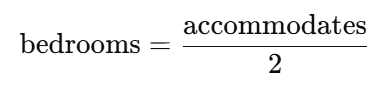

is a reasonable approximation for imputing missing values in the **bedrooms** and **beds** column.

* As a general rule of thumb, the missing beds values will be filled in using the bedrooms column values. If both column values are missing, then the above formula will apply.

For remainder 280 missing 'bathroom' rows and 5 missing 'host_listings_count' rows, remove rows as to get a fully cleaned dataset

In [45]:
listings_df = listings_df.dropna(subset=['bathrooms', 'host_listings_count'])

In [46]:
### Before calculating occupancy, bookings_per_year and revenue, reformat and 
### impute missing price values. (Reference: OpenAI. (2024). ChatGPT (Mar 14 version) [GPT-4o]. https://chat.openai.com/chat)
# Impute missing price values using mean prices for each "accommodates" value
mean_prices = listings_df.groupby("accommodates")["price"].mean()
acc_price_dict = mean_prices.to_dict()
listings_df["price"] = listings_df.apply(
    lambda row: acc_price_dict[row["accommodates"]] if pd.isnull(row["price"]) and row["accommodates"] in acc_price_dict else row["price"],
    axis=1
)

In [47]:
# Check for missing value counts
listings_df.isna().sum().sort_values(ascending=False)

beds                           32926
bedrooms                       12516
host_response_rate                 0
minimum_nights                     0
description_length                 0
reviews_per_month                  0
instant_bookable                   0
review_scores_value                0
review_scores_location             0
review_scores_communication        0
review_scores_checkin              0
review_scores_cleanliness          0
review_scores_accuracy             0
review_scores_rating               0
availability_365                   0
amenities                          0
price                              0
host_acceptance_rate               0
bathrooms                          0
accommodates                       0
room_type                          0
longitude                          0
latitude                           0
neighbourhood_cleansed             0
host_identity_verified             0
host_has_profile_pic               0
host_listings_count                0
h

In [48]:
# Check imputed beds, bedrooms columns
test_df = listings_df[['beds','bedrooms','accommodates']]
display(test_df)

beds  bedrooms  accommodates
0       1.0       1.0             1
1       1.0       1.0             2
2       3.0       3.0             6
3       1.0       1.0             4
4       1.0       1.0             2
...     ...       ...           ...
96177   4.0       4.0             7
96178   5.0       3.0             6
96179   2.0       2.0             5
96180   4.0       3.0             5
96181   4.0       2.0             7

[95897 rows x 3 columns]

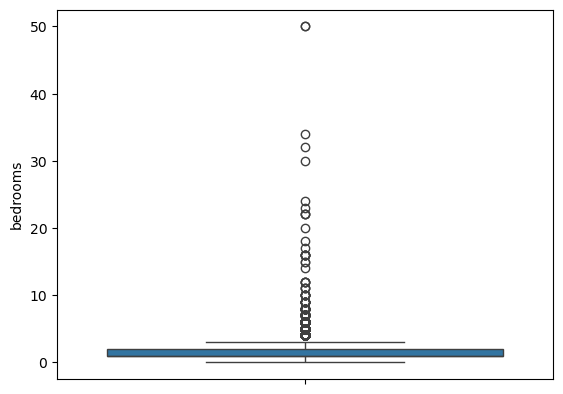

In [50]:
sns.boxplot(listings_df['bedrooms'])
plt.show()

In [51]:
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95897 entries, 0 to 96181
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_response_rate           95897 non-null  int32  
 1   host_acceptance_rate         95897 non-null  int32  
 2   host_is_superhost            95897 non-null  int32  
 3   host_listings_count          95897 non-null  float64
 4   host_has_profile_pic         95897 non-null  int32  
 5   host_identity_verified       95897 non-null  int32  
 6   neighbourhood_cleansed       95897 non-null  object 
 7   latitude                     95897 non-null  float64
 8   longitude                    95897 non-null  float64
 9   room_type                    95897 non-null  object 
 10  accommodates                 95897 non-null  int64  
 11  bathrooms                    95897 non-null  float64
 12  bedrooms                     83381 non-null  float64
 13  beds                 

In [52]:
listings_df.sample(5)

host_response_rate  host_acceptance_rate  host_is_superhost  \
91809                 100                    99                  1   
75413                  80                    99                  0   
82880                 100                    97                  1   
83665                  97                    78                  0   
61547                 100                    84                  1   

       host_listings_count  host_has_profile_pic  host_identity_verified  \
91809                 33.0                     1                       1   
75413                  4.0                     0                       1   
82880                 11.0                     1                       1   
83665                 11.0                     1                       1   
61547                  8.0                     1                       1   

       neighbourhood_cleansed   latitude  longitude        room_type  ...  \
91809              Wandsworth  51.472620  -0.167110  Entire home/apt  ...   
75413  Hammersmith and Fulham  51.482070  -0.200970  Entire home/apt  ...   
82880    Kingston upon Thames  51.427835  -0.296844  Entire home/apt  ...   
83665                 Lambeth  51.443678  -0.129559     Private room  ...   
61547                Havering  51.562847   0.205538     Private room  ...   

       review_scores_accuracy  review_scores_cleanliness  \
91809                    0.00                       0.00   
75413                    4.57                       4.71   
82880                    0.00                       0.00   
83665                    5.00                       5.00   
61547                    5.00                       4.86   

       review_scores_checkin  review_scores_communication  \
91809                   0.00                         0.00   
75413                   4.71                         4.57   
82880                   0.00                         0.00   
83665                   5.00                         5.00   
61547                   5.00                         5.00   

      review_scores_location  review_scores_value  instant_bookable  \
91809                   0.00                 0.00                 0   
75413                   4.71                 4.57                 1   
82880                   0.00                 0.00                 1   
83665                   4.33                 5.00                 0   
61547                   4.71                 4.57                 0   

       reviews_per_month  description_length  host_about_length  
91809               0.00                 519                  0  
75413               1.02                 265                  0  
82880               0.00                 475                385  
83665               1.18                 137                123  
61547               0.58                 524                  0  

[5 rows x 29 columns]

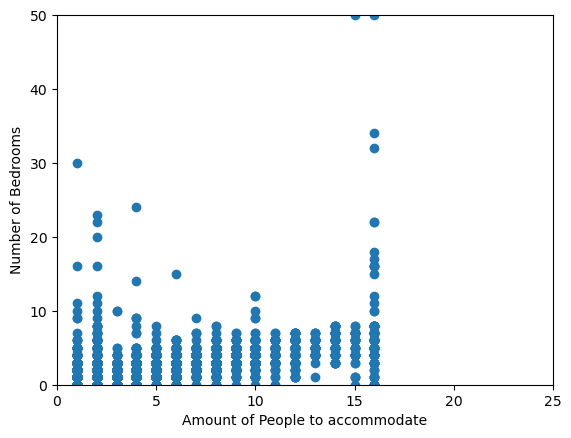

In [53]:
# Visualize correlation between bedrooms and accommodates columns
x = listings_df['accommodates']
y = listings_df['bedrooms']

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
 return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, slope * x + intercept)
plt.ylim(ymin=0, ymax=50)
plt.xlim(xmin=0, xmax=25)
plt.xlabel("Amount of People to accommodate")
plt.ylabel ("Number of Bedrooms")
plt.show()

In [54]:
listings_df['beds'] = listings_df['beds'].fillna(listings_df['bedrooms'])
listings_df['beds'] = listings_df['beds'].fillna(np.ceil(listings_df['accommodates']/2))
listings_df['bedrooms'] = listings_df['bedrooms'].fillna(np.ceil(listings_df['accommodates']/2))
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95897 entries, 0 to 96181
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_response_rate           95897 non-null  int32  
 1   host_acceptance_rate         95897 non-null  int32  
 2   host_is_superhost            95897 non-null  int32  
 3   host_listings_count          95897 non-null  float64
 4   host_has_profile_pic         95897 non-null  int32  
 5   host_identity_verified       95897 non-null  int32  
 6   neighbourhood_cleansed       95897 non-null  object 
 7   latitude                     95897 non-null  float64
 8   longitude                    95897 non-null  float64
 9   room_type                    95897 non-null  object 
 10  accommodates                 95897 non-null  int64  
 11  bathrooms                    95897 non-null  float64
 12  bedrooms                     95897 non-null  float64
 13  beds                 

In [55]:
# Check for missing value counts
listings_df.isna().sum().sort_values(ascending=False)

host_response_rate             0
price                          0
description_length             0
reviews_per_month              0
instant_bookable               0
review_scores_value            0
review_scores_location         0
review_scores_communication    0
review_scores_checkin          0
review_scores_cleanliness      0
review_scores_accuracy         0
review_scores_rating           0
availability_365               0
minimum_nights                 0
amenities                      0
host_acceptance_rate           0
beds                           0
bedrooms                       0
bathrooms                      0
accommodates                   0
room_type                      0
longitude                      0
latitude                       0
neighbourhood_cleansed         0
host_identity_verified         0
host_has_profile_pic           0
host_listings_count            0
host_is_superhost              0
host_about_length              0
dtype: int64

In [56]:
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95897 entries, 0 to 96181
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_response_rate           95897 non-null  int32  
 1   host_acceptance_rate         95897 non-null  int32  
 2   host_is_superhost            95897 non-null  int32  
 3   host_listings_count          95897 non-null  float64
 4   host_has_profile_pic         95897 non-null  int32  
 5   host_identity_verified       95897 non-null  int32  
 6   neighbourhood_cleansed       95897 non-null  object 
 7   latitude                     95897 non-null  float64
 8   longitude                    95897 non-null  float64
 9   room_type                    95897 non-null  object 
 10  accommodates                 95897 non-null  int64  
 11  bathrooms                    95897 non-null  float64
 12  bedrooms                     95897 non-null  float64
 13  beds                 

In [57]:
# listings_df.to_csv("draft_listings_df2.csv")

# Step 3: Feature Engineering for analytical purposes

There are 3 primary attribute types in consideration when determining airbnb performance (price, etc.):
1. Host attributes (host_response_time, host_is_superhost etc.)
2. Property attributes (accommodates, amenities etc.)
3. User review attributes (review_score_rating etc.)

In [58]:
def calc_amenities_score(amenities_list):
    amenities = ast.literal_eval(amenities_list)
    return len(amenities)

listings_df['amenities_score'] = listings_df['amenities'].apply(calc_amenities_score)
listings_df = listings_df.drop(columns='amenities')
listings_df.head()

host_response_rate  host_acceptance_rate  host_is_superhost  \
0                 100                    77                  1   
1                  92                   100                  0   
2                 100                    94                  1   
3                 100                    25                  0   
4                  92                    82                  0   

   host_listings_count  host_has_profile_pic  host_identity_verified  \
0                  3.0                     1                       1   
1                  1.0                     1                       1   
2                  7.0                     1                       1   
3                  1.0                     1                       1   
4                  2.0                     1                       0   

   neighbourhood_cleansed  latitude  longitude        room_type  ...  \
0               Islington  51.56861   -0.11270     Private room  ...   
1  Kensington and Chelsea  51.48780   -0.16813  Entire home/apt  ...   
2             Westminster  51.52195   -0.14094  Entire home/apt  ...   
3              Wandsworth  51.47072   -0.16266  Entire home/apt  ...   
4    Richmond upon Thames  51.46410   -0.32498     Private room  ...   

   review_scores_cleanliness  review_scores_checkin  \
0                       4.74                   4.77   
1                       4.88                   4.88   
2                       4.72                   4.72   
3                       4.91                   4.90   
4                       4.56                   4.56   

   review_scores_communication  review_scores_location  review_scores_value  \
0                         4.84                    4.72                 4.72   
1                         4.84                    4.93                 4.75   
2                         4.72                    4.89                 4.61   
3                         4.93                    4.59                 4.65   
4                         4.50                    4.67                 4.22   

   instant_bookable  reviews_per_month  description_length  host_about_length  \
0                 0               0.26                 299                240   
1                 0               0.54                 254                357   
2                 0               0.34                 378               1348   
3                 0               0.56                 490                518   
4                 0               0.11                 101                105   

   amenities_score  
0               55  
1               25  
2               38  
3               65  
4               12  

[5 rows x 29 columns]

(array([45868., 25167.,  9500.,  2822.,  1091.]),
 array([ 2.,  4.,  6.,  8., 10., 12.]),
 <BarContainer object of 5 artists>)

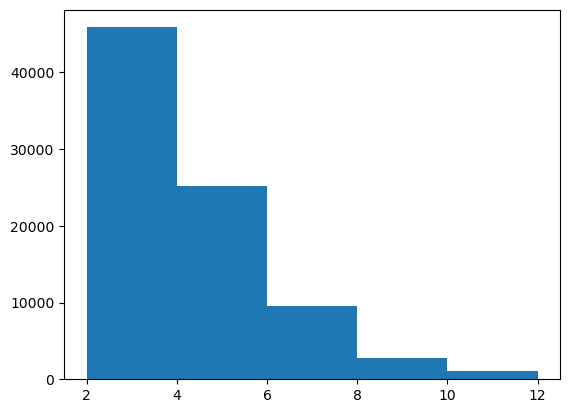

In [59]:
plt.hist(x, bins = [2,4,6,8,10,12])

(array([47184., 21728.,  7717.,  3000.,   893.,   246.,   109.]),
 array([1., 2., 3., 4., 5., 6., 7., 8.]),
 <BarContainer object of 7 artists>)

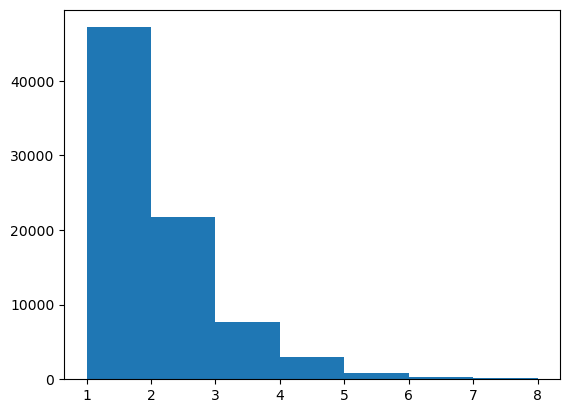

In [60]:
plt.hist(y, bins=[1,2,3,4,5,6,7,8])

In [61]:
display(listings_df.head())

host_response_rate  host_acceptance_rate  host_is_superhost  \
0                 100                    77                  1   
1                  92                   100                  0   
2                 100                    94                  1   
3                 100                    25                  0   
4                  92                    82                  0   

   host_listings_count  host_has_profile_pic  host_identity_verified  \
0                  3.0                     1                       1   
1                  1.0                     1                       1   
2                  7.0                     1                       1   
3                  1.0                     1                       1   
4                  2.0                     1                       0   

   neighbourhood_cleansed  latitude  longitude        room_type  ...  \
0               Islington  51.56861   -0.11270     Private room  ...   
1  Kensington and Chelsea  51.48780   -0.16813  Entire home/apt  ...   
2             Westminster  51.52195   -0.14094  Entire home/apt  ...   
3              Wandsworth  51.47072   -0.16266  Entire home/apt  ...   
4    Richmond upon Thames  51.46410   -0.32498     Private room  ...   

   review_scores_cleanliness  review_scores_checkin  \
0                       4.74                   4.77   
1                       4.88                   4.88   
2                       4.72                   4.72   
3                       4.91                   4.90   
4                       4.56                   4.56   

   review_scores_communication  review_scores_location  review_scores_value  \
0                         4.84                    4.72                 4.72   
1                         4.84                    4.93                 4.75   
2                         4.72                    4.89                 4.61   
3                         4.93                    4.59                 4.65   
4                         4.50                    4.67                 4.22   

   instant_bookable  reviews_per_month  description_length  host_about_length  \
0                 0               0.26                 299                240   
1                 0               0.54                 254                357   
2                 0               0.34                 378               1348   
3                 0               0.56                 490                518   
4                 0               0.11                 101                105   

   amenities_score  
0               55  
1               25  
2               38  
3               65  
4               12  

[5 rows x 29 columns]

In [62]:
listings_df["Occupancy"] = (listings_df["reviews_per_month"]*listings_df["minimum_nights"]*2)/listings_df["availability_365"]
listings_df['Occupancy'] = listings_df['Occupancy'].fillna(0)
listings_df["Bookings_per_year"] = listings_df['reviews_per_month']*2*12
listings_df["Estimated_monthly_revenue"] = listings_df["reviews_per_month"]*2*listings_df["price"]*listings_df["minimum_nights"]

In [63]:
listings_df.sample(5)

host_response_rate  host_acceptance_rate  host_is_superhost  \
32228                  92                    82                  0   
18994                  92                   100                  0   
39339                 100                   100                  0   
41490                 100                    98                  0   
91043                 100                   100                  0   

       host_listings_count  host_has_profile_pic  host_identity_verified  \
32228                  2.0                     1                       0   
18994                  1.0                     1                       1   
39339                  2.0                     1                       1   
41490                  4.0                     1                       1   
91043                 20.0                     1                       1   

       neighbourhood_cleansed   latitude  longitude        room_type  ...  \
32228  Hammersmith and Fulham  51.484940  -0.209820  Entire home/apt  ...   
18994               Southwark  51.485770  -0.107130     Private room  ...   
39339               Islington  51.524860  -0.096310     Private room  ...   
41490               Greenwich  51.486810   0.032720     Private room  ...   
91043             Westminster  51.530346  -0.187573  Entire home/apt  ...   

       review_scores_location  review_scores_value  instant_bookable  \
32228                    4.86                 5.00                 0   
18994                    4.88                 4.94                 0   
39339                    4.76                 4.67                 0   
41490                    4.72                 4.46                 0   
91043                    4.00                 3.00                 1   

       reviews_per_month  description_length  host_about_length  \
32228               0.11                 497                  0   
18994               0.28                 336                236   
39339               1.83                 517                181   
41490               1.14                 417                186   
91043               0.71                 514                151   

       amenities_score  Occupancy  Bookings_per_year  \
32228               17        inf               2.64   
18994               19        inf               6.72   
39339               46   0.183000              43.92   
41490               37   0.019322              27.36   
91043               34   0.266250              17.04   

       Estimated_monthly_revenue  
32228                  53.285556  
18994                  90.742479  
39339                 215.940000  
41490                 335.160000  
91043                 826.440000  

[5 rows x 32 columns]

In [64]:
### Check that non-zero 'reviews_per_month' values contribute reasonable 'Occupancy' values
non_zero_review_df = listings_df[listings_df["reviews_per_month"] != 0]
non_zero_review_df[["reviews_per_month","Occupancy"]].sample(20)

reviews_per_month  Occupancy
30210               0.03        inf
19689               0.80   0.126316
22213               1.60   0.071111
79071               0.49   0.003984
36870               0.51   0.006667
20678               0.41   0.009111
32669               3.17   0.158500
39154               0.83   0.021419
55281               0.59   0.031607
15860               0.77   0.012078
80146               1.00   0.007752
50517               4.47   0.111750
73590               2.76   1.104000
90334               8.11   0.600741
52688               0.29        inf
2217                0.03        inf
763                 2.55   0.510000
59911               1.67   0.044533
84496               0.49   0.050515
38713               0.69   0.033253

In [65]:
### Impute infinite 'Occupancy' values using neighbourhood, room type medians
# Analyze the distribution of "Occupancy" for rows with finite values to find suitable replacement strategies
inf_occupancy = listings_df[listings_df["Occupancy"] != float('inf')]["Occupancy"]

# Group data by room type and neighborhood to find median Occupancy for imputation
room_type_medians = listings_df[listings_df["Occupancy"] != float('inf')].groupby("room_type")["Occupancy"].median()
neighborhood_medians = listings_df[listings_df["Occupancy"] != float('inf')].groupby("neighbourhood_cleansed")["Occupancy"].median()

# Create function to impute Occupancy rate
def impute_occupancy(row, room_medians, neighborhood_medians, overall_median):
    if row["Occupancy"] == float('inf'):
        room_median = room_medians.get(row["room_type"], overall_median)
        neighborhood_median = neighborhood_medians.get(row["neighbourhood_cleansed"], overall_median)
        return (room_median + neighborhood_median) / 2  # Average of room type and neighborhood medians
    return row["Occupancy"]

# Overall median for fallback
overall_median = inf_occupancy.median()

# Apply imputation (Reference: OpenAI. (2024). ChatGPT (Mar 14 version) [GPT-4o]. https://chat.openai.com/chat)
listings_df["Occupancy"] = listings_df.apply(
    impute_occupancy,
    axis=1,
    room_medians=room_type_medians,
    neighborhood_medians=neighborhood_medians,
    overall_median=overall_median,
)

display(listings_df[["Occupancy","availability_365"]])

Occupancy  availability_365
0       0.001433               363
1       0.017705               244
2       0.007158               285
3       0.007972               281
4       0.001205               365
...          ...               ...
96177   0.000000               348
96178   0.000000               329
96179   0.000000               360
96180   0.000000                22
96181   0.000000               179

[95897 rows x 2 columns]

In [66]:
# Define the London city center coordinates (Oxford Circus station)
london_cc_coord = (51.51529, -0.14197)

# Function to calculate distance in kilometers between two coordinates (Reference: OpenAI. (2024). ChatGPT (Mar 14 version) [GPT-4o]. https://chat.openai.com/chat)
def calculate_distance(lat1, lon1, lat2, lon2):
    import math
    mean_lat = math.radians((lat1 + lat2) / 2.0)

    lat_km = 111.32
    lon_km = 111.32 * math.cos(mean_lat)

    delta_lat = lat2 - lat1
    delta_lon = lon2 - lon1

    distance = math.sqrt((delta_lat * lat_km) ** 2 + (delta_lon * lon_km) ** 2)
    return distance

listings_df['distance_to_cc_km'] = listings_df.apply(
    lambda row: calculate_distance(row['latitude'], row['longitude'], london_cc_coord[0], london_cc_coord[1]),
    axis=1
)

listings_df.sample(5)

host_response_rate  host_acceptance_rate  host_is_superhost  \
86675                 100                    95                  1   
12945                  92                    82                  0   
60488                 100                   100                  1   
94984                 100                    10                  0   
24508                  92                    82                  0   

       host_listings_count  host_has_profile_pic  host_identity_verified  \
86675                  2.0                     1                       1   
12945                  1.0                     1                       1   
60488                  1.0                     1                       1   
94984                  2.0                     1                       1   
24508                  1.0                     1                       0   

      neighbourhood_cleansed   latitude  longitude        room_type  ...  \
86675         Waltham Forest  51.578655  -0.031907     Private room  ...   
12945          Tower Hamlets  51.511710  -0.065660     Private room  ...   
60488               Hounslow  51.491468  -0.310005  Entire home/apt  ...   
94984              Redbridge  51.562053   0.099237  Entire home/apt  ...   
24508                 Camden  51.551410  -0.171250  Entire home/apt  ...   

       review_scores_value  instant_bookable  reviews_per_month  \
86675                  5.0                 1               0.86   
12945                  0.0                 1               0.00   
60488                  5.0                 0               0.90   
94984                  0.0                 0               0.00   
24508                  4.0                 0               0.03   

       description_length  host_about_length  amenities_score  Occupancy  \
86675                 221                  0               10   0.095556   
12945                 156                189               11   0.000000   
60488                 475                  0               24   0.057447   
94984                 253                  0                3   0.000000   
24508                 290                 37               14   0.014672   

       Bookings_per_year  Estimated_monthly_revenue  distance_to_cc_km  
86675              20.64                  77.400000          10.383193  
12945               0.00                   0.000000           5.301589  
60488              21.60                 999.000000          11.941850  
94984               0.00                   0.000000          17.493559  
24508               0.72                  39.012936           4.503166  

[5 rows x 33 columns]

In [67]:
listings_df.describe()

host_response_rate  host_acceptance_rate  host_is_superhost  \
count        95897.000000          95897.000000       95897.000000   
mean            92.364766             82.290875           0.181121   
std             16.454193             23.317017           0.385121   
min              0.000000              0.000000           0.000000   
25%             92.000000             82.000000           0.000000   
50%             98.000000             83.000000           0.000000   
75%            100.000000             99.000000           0.000000   
max            100.000000            100.000000           1.000000   

       host_listings_count  host_has_profile_pic  host_identity_verified  \
count         95897.000000          95897.000000            95897.000000   
mean             28.156126              0.959290                0.876169   
std             165.646380              0.197619                0.329390   
min               1.000000              0.000000                0.000000   
25%               1.000000              1.000000                1.000000   
50%               2.000000              1.000000                1.000000   
75%               8.000000              1.000000                1.000000   
max            2930.000000              1.000000                1.000000   

           latitude     longitude  accommodates     bathrooms  ...  \
count  95897.000000  95897.000000  95897.000000  95897.000000  ...   
mean      51.509642     -0.126687      3.274232      1.337951  ...   
std        0.048973      0.100840      2.037129      0.698171  ...   
min       51.295937     -0.497800      1.000000      0.000000  ...   
25%       51.483450     -0.189160      2.000000      1.000000  ...   
50%       51.513740     -0.126080      2.000000      1.000000  ...   
75%       51.539389     -0.067220      4.000000      1.500000  ...   
max       51.681642      0.295731     16.000000     48.000000  ...   

       review_scores_value  instant_bookable  reviews_per_month  \
count         95897.000000      95897.000000       95897.000000   
mean              3.442584          0.299467           0.764166   
std               2.057088          0.458027           1.238758   
min               0.000000          0.000000           0.000000   
25%               0.000000          0.000000           0.000000   
50%               4.590000          0.000000           0.260000   
75%               4.860000          1.000000           1.000000   
max               5.000000          1.000000          42.310000   

       description_length  host_about_length  amenities_score     Occupancy  \
count        95897.000000       95897.000000     95897.000000  95897.000000   
mean           353.299592         169.148826        27.077865      0.108859   
std            164.925500         324.567348        15.097296      1.199272   
min              0.000000           0.000000         0.000000      0.000000   
25%            238.000000           0.000000        14.000000      0.000000   
50%            405.000000          13.000000        26.000000      0.009979   
75%            495.000000         257.000000        38.000000      0.030196   
max           1000.000000       11215.000000        98.000000    248.400000   

       Bookings_per_year  Estimated_monthly_revenue  distance_to_cc_km  
count       95897.000000               95897.000000       95897.000000  
mean           18.339990                 833.057594           7.545828  
std            29.730182                6262.338518           4.806144  
min             0.000000                   0.000000           0.012555  
25%             0.000000                   0.000000           4.076796  
50%             6.240000                 162.500000           6.341799  
75%            24.000000                 650.100000          10.202894  
max          1015.440000              633600.000000          30.577707  

[8 rows x 31 columns]

# Step 4: Visualization and Modelling of dataset features

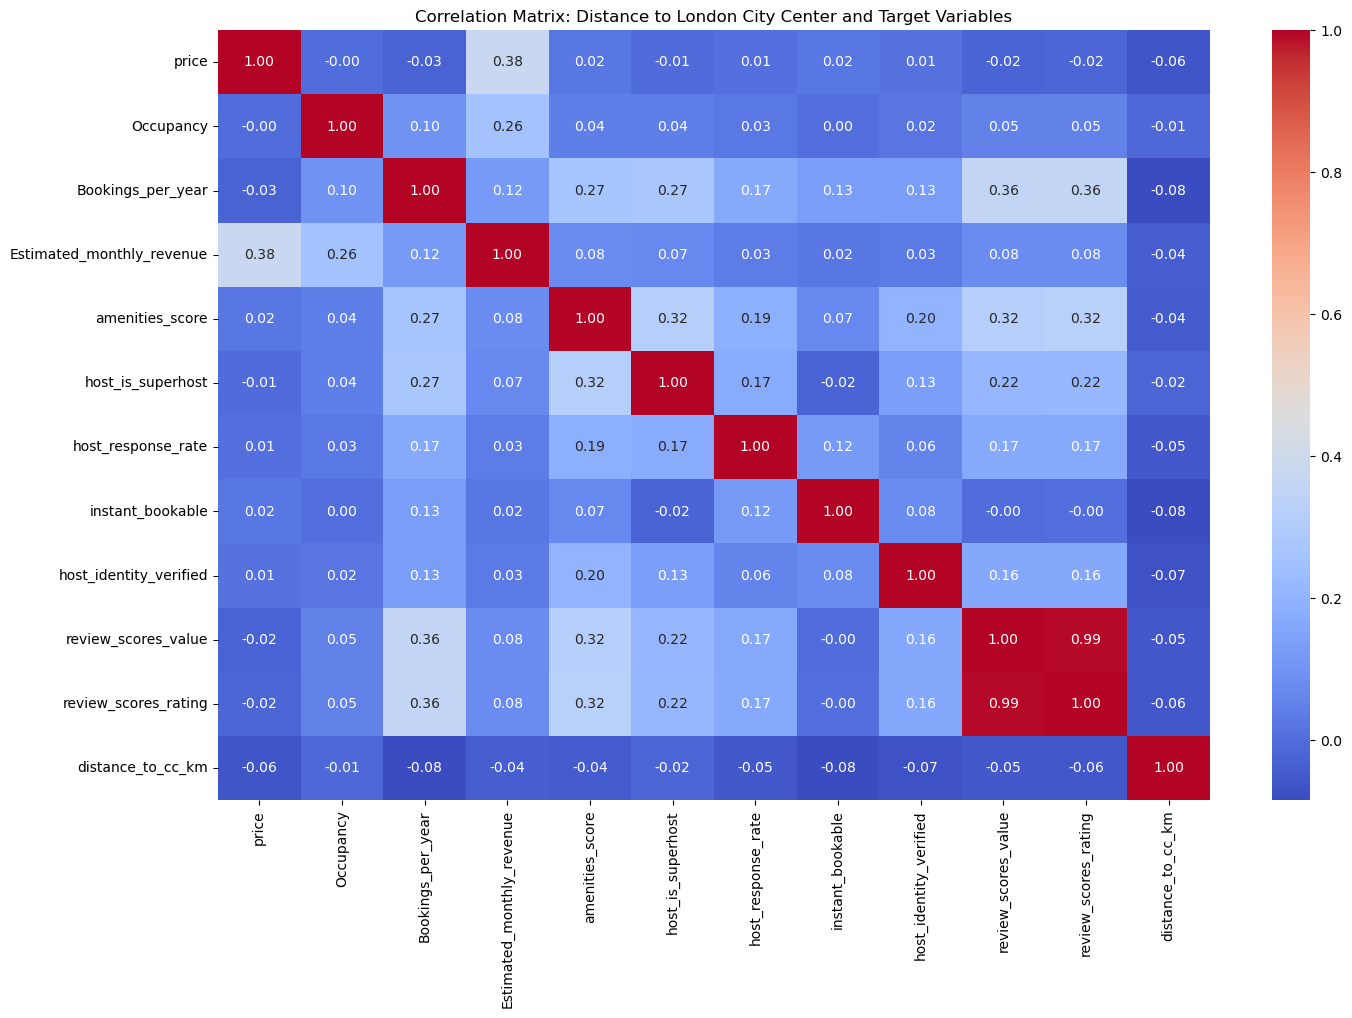

In [68]:
# Correlation matrix for distance_to_london_cc_km and target variables
corr_matrix = listings_df[
    ['price', 'Occupancy', 'Bookings_per_year', 'Estimated_monthly_revenue', 
     'amenities_score', 'host_is_superhost', 'host_response_rate', 'instant_bookable', 
     'host_identity_verified', 'review_scores_value', 'review_scores_rating', 'distance_to_cc_km']
].corr()

# Visualize corr_matrix using sns heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix: Distance to London City Center and Target Variables')
plt.show()

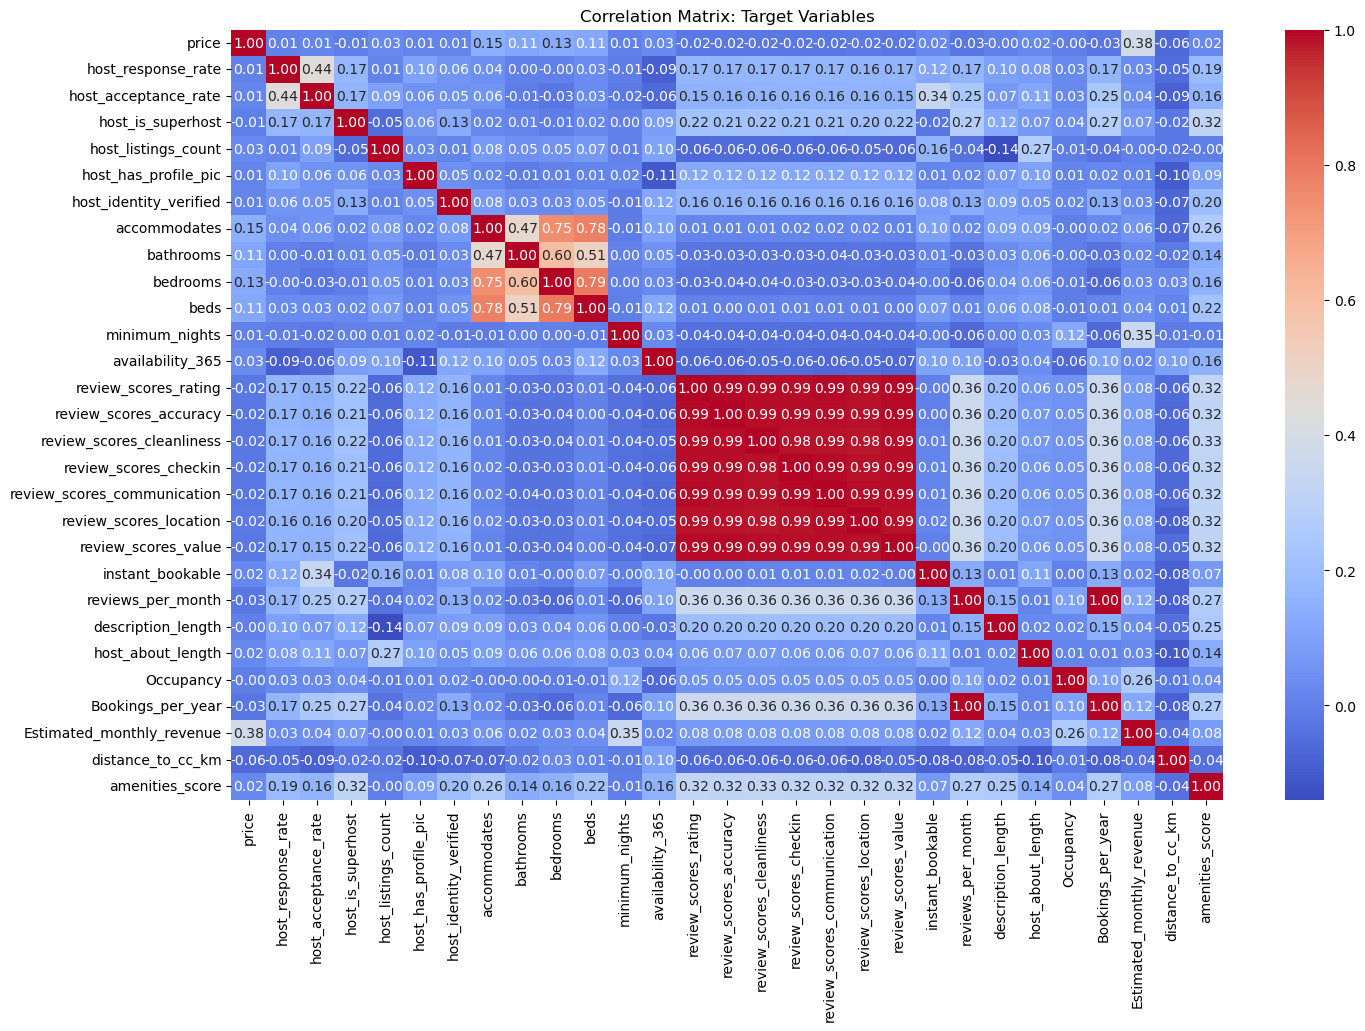

In [69]:
# Correlation matrix for distance_to_london_cc_km and target variables
corr_matrix = listings_df[
    ['price', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_listings_count', 'host_has_profile_pic', 'host_identity_verified',
       'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'minimum_nights', 'availability_365', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'reviews_per_month', 'description_length', 'host_about_length',
       'Occupancy', 'Bookings_per_year', 'Estimated_monthly_revenue',
       'distance_to_cc_km', 'amenities_score']
].corr()

# Visualize corr_matrix using sns heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix: Target Variables')
plt.show()

C:\Users\nixon\AppData\Local\Temp\ipykernel_39264\4045293593.py:18: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
C:\Users\nixon\AppData\Local\Temp\ipykernel_39264\4045293593.py:25: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
C:\Users\nixon\AppData\Local\Temp\ipykernel_39264\4045293593.py:32: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
C:\Users\nixon\AppData\Local\Temp\ipykernel_39264\4045293593.py:39: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


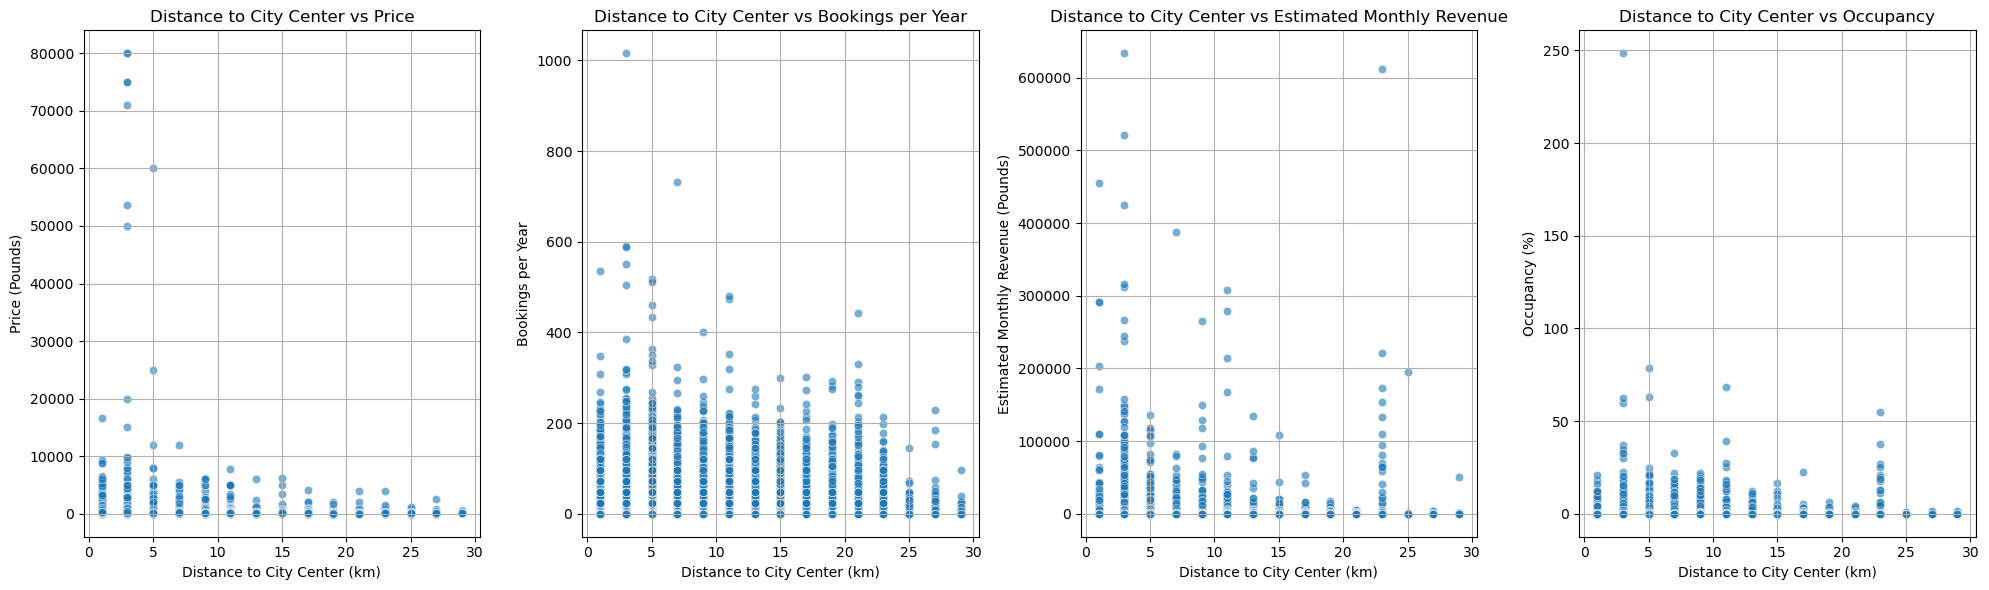

In [70]:
# Create bins for distance_to_cc_km with a bin width of 2 (Reference: OpenAI. (2024). ChatGPT (Mar 14 version) [GPT-4o]. https://chat.openai.com/chat)
bins = range(0, int(listings_df['distance_to_cc_km'].max()) + 2, 2)
listings_df['distance_to_cc_km_binned'] = pd.cut(listings_df['distance_to_cc_km'], bins=bins, include_lowest=True)

# Calculate the midpoints of the bins
bin_midpoints = [0.5 * (bins[i] + bins[i+1]) for i in range(len(bins)-1)]
bin_labels = {interval: midpoint for interval, midpoint in zip(listings_df['distance_to_cc_km_binned'].cat.categories, bin_midpoints)}

# Map the binned values to their midpoints
listings_df['distance_to_cc_km_binned_midpoint'] = listings_df['distance_to_cc_km_binned'].map(bin_labels)

# Scatterplots for distance_to_london_cc_km vs target variables
fig, axes = plt.subplots(1, 4, figsize=(20, 6), sharex=True, sharey=False)

palette = sns.color_palette("viridis", as_cmap=True)

# Plot sub scatterplots
sns.scatterplot(
    ax=axes[0], data=listings_df, x='distance_to_cc_km_binned_midpoint', y='price', alpha=0.6, palette=palette
).set_title('Distance to City Center vs Price')
axes[0].set_xlabel('Distance to City Center (km)')
axes[0].set_ylabel('Price (Pounds)')
axes[0].grid(True)

sns.scatterplot(
    ax=axes[1], data=listings_df, x='distance_to_cc_km_binned_midpoint', y='Bookings_per_year', alpha=0.6, palette=palette
).set_title('Distance to City Center vs Bookings per Year')
axes[1].set_xlabel('Distance to City Center (km)')
axes[1].set_ylabel('Bookings per Year')
axes[1].grid(True)

sns.scatterplot(
    ax=axes[2], data=listings_df, x='distance_to_cc_km_binned_midpoint', y='Estimated_monthly_revenue', alpha=0.6, palette=palette
).set_title('Distance to City Center vs Estimated Monthly Revenue')
axes[2].set_xlabel('Distance to City Center (km)')
axes[2].set_ylabel('Estimated Monthly Revenue (Pounds)')
axes[2].grid(True)

sns.scatterplot(
    ax=axes[3], data=listings_df, x='distance_to_cc_km_binned_midpoint', y='Occupancy', alpha=0.6, palette=palette
).set_title('Distance to City Center vs Occupancy')
axes[3].set_xlabel('Distance to City Center (km)')
axes[3].set_ylabel('Occupancy (%)')
axes[3].grid(True)

plt.tight_layout()
plt.show()

In [71]:
feq2 = feq2.groupby('neighbourhood_cleansed')[['price', 'Occupancy', 'Bookings_per_year',
                                                'Estimated_monthly_revenue',
                                                  'review_scores_rating']].mean()
count_df = listings_df.groupby('neighbourhood_cleansed').size().reset_index(name='Number of Listings')
feq2 = feq2.merge(count_df, on='neighbourhood_cleansed')
feq2 = feq2.sort_values(by='price', ascending=False)
display(feq2)

NameError: name 'feq2' is not defined

In [72]:
feq2 = listings_df # Reference: Kaggle (https://www.kaggle.com/code/erikbruin/airbnb-the-amsterdam-story-with-interactive-maps/notebook)
feq2 = feq2.groupby('neighbourhood_cleansed')[['price', 'Occupancy', 'Bookings_per_year',
                                                'Estimated_monthly_revenue',
                                                  'review_scores_rating']].mean()
count_df = listings_df.groupby('neighbourhood_cleansed').size().reset_index(name='Number of Listings')
feq2 = feq2.merge(count_df, on='neighbourhood_cleansed')
feq2 = feq2.sort_values(by='price', ascending=False)

lond = gpd.read_file("neighbourhoods.geojson")
lond2 = pd.merge(lond, feq2, left_on='neighbourhood', right_on='neighbourhood_cleansed', how='left')

# Rename columns to match required performance metrics
lond2.rename(columns={
    'price': 'Average Price',
    'Occupancy': 'Average Occupancy Rate',
    'Bookings_per_year': 'Average Bookings per Year',
    'Estimated_monthly_revenue': 'Average Estimated Monthly Revenue',
    'review_scores_rating': 'Average Review Score'
}, inplace=True)

# Round performance metrics to decimals
lond2['Average Price'] = lond2['Average Price'].round(decimals=0)
lond2['Average Occupancy Rate'] = (lond2['Average Occupancy Rate'] * 100).round(decimals=0).astype(int).astype(str) + '%'
lond2['Average Bookings per Year'] = lond2['Average Bookings per Year'].round(decimals=2)
lond2['Average Estimated Monthly Revenue'] = lond2['Average Estimated Monthly Revenue'].round(decimals=0)
lond2['Average Review Score'] = lond2['Average Review Score'].round(decimals=2)

# Create dictionary for mapping neighbourhoods to average prices
map_dict = lond2.set_index('neighbourhood')['Average Price'].to_dict()

# Create color scale for map
color_scale = LinearColormap(['yellow', 'red'], vmin=min(map_dict.values()), vmax=max(map_dict.values()))

# Create the map
map4 = fm.Map(location=[51.495, -0.102], zoom_start=11)

# Add geoJson layer to the map
fm.GeoJson(
    data=lond2,
    name='London',
    tooltip=fm.features.GeoJsonTooltip(
        fields=['neighbourhood', 'Number of Listings', 'Average Estimated Monthly Revenue', 'Average Price', 'Average Occupancy Rate', 'Average Bookings per Year', 'Average Review Score'],
        labels=True,
        sticky=False
    ),
    style_function=lambda feature: {
        'fillColor': get_color(feature),
        'color': 'black',
        'weight': 1,
        'dashArray': '5, 5',
        'fillOpacity': 0.5
    },
    highlight_function=lambda feature: {
        'weight': 3,
        'fillColor': get_color(feature),
        'fillOpacity': 0.8
    }
).add_to(map4)

map4

In [73]:
listings_df.columns

Index(['host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_listings_count', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price',
       'minimum_nights', 'availability_365', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'reviews_per_month', 'description_length', 'host_about_length',
       'amenities_score', 'Occupancy', 'Bookings_per_year',
       'Estimated_monthly_revenue', 'distance_to_cc_km',
       'distance_to_cc_km_binned', 'distance_to_cc_km_binned_midpoint'],
      dtype='object')

In [74]:
listings_df.describe().T

count        mean          std        min  \
host_response_rate           95897.0   92.364766    16.454193   0.000000   
host_acceptance_rate         95897.0   82.290875    23.317017   0.000000   
host_is_superhost            95897.0    0.181121     0.385121   0.000000   
host_listings_count          95897.0   28.156126   165.646380   1.000000   
host_has_profile_pic         95897.0    0.959290     0.197619   0.000000   
host_identity_verified       95897.0    0.876169     0.329390   0.000000   
latitude                     95897.0   51.509642     0.048973  51.295937   
longitude                    95897.0   -0.126687     0.100840  -0.497800   
accommodates                 95897.0    3.274232     2.037129   1.000000   
bathrooms                    95897.0    1.337951     0.698171   0.000000   
bedrooms                     95897.0    1.528849     1.000117   0.000000   
beds                         95897.0    1.765040     1.288380   0.000000   
price                        95897.0  189.263781   683.761412   1.000000   
minimum_nights               95897.0    5.440191    23.060798   1.000000   
availability_365             95897.0  132.214887   133.956284   0.000000   
review_scores_rating         95897.0    3.497998     2.082203   0.000000   
review_scores_accuracy       95897.0    3.527760     2.098307   0.000000   
review_scores_cleanliness    95897.0    3.469055     2.071187   0.000000   
review_scores_checkin        95897.0    3.571993     2.118681   0.000000   
review_scores_communication  95897.0    3.591018     2.127097   0.000000   
review_scores_location       95897.0    3.526086     2.089106   0.000000   
review_scores_value          95897.0    3.442584     2.057088   0.000000   
instant_bookable             95897.0    0.299467     0.458027   0.000000   
reviews_per_month            95897.0    0.764166     1.238758   0.000000   
description_length           95897.0  353.299592   164.925500   0.000000   
host_about_length            95897.0  169.148826   324.567348   0.000000   
amenities_score              95897.0   27.077865    15.097296   0.000000   
Occupancy                    95897.0    0.108859     1.199272   0.000000   
Bookings_per_year            95897.0   18.339990    29.730182   0.000000   
Estimated_monthly_revenue    95897.0  833.057594  6262.338518   0.000000   
distance_to_cc_km            95897.0    7.545828     4.806144   0.012555   

                                    25%         50%         75%            max  
host_response_rate            92.000000   98.000000  100.000000     100.000000  
host_acceptance_rate          82.000000   83.000000   99.000000     100.000000  
host_is_superhost              0.000000    0.000000    0.000000       1.000000  
host_listings_count            1.000000    2.000000    8.000000    2930.000000  
host_has_profile_pic           1.000000    1.000000    1.000000       1.000000  
host_identity_verified         1.000000    1.000000    1.000000       1.000000  
latitude                      51.483450   51.513740   51.539389      51.681642  
longitude                     -0.189160   -0.126080   -0.067220       0.295731  
accommodates                   2.000000    2.000000    4.000000      16.000000  
bathrooms                      1.000000    1.000000    1.500000      48.000000  
bedrooms                       1.000000    1.000000    2.000000      50.000000  
beds                           1.000000    1.000000    2.000000      50.000000  
price                         90.000000  121.103537  216.738533   80000.000000  
minimum_nights                 1.000000    2.000000    4.000000    1125.000000  
availability_365               0.000000   88.000000  263.000000     365.000000  
review_scores_rating           0.000000    4.670000    4.960000       5.000000  
review_scores_accuracy         0.000000    4.750000    5.000000       5.000000  
review_scores_cleanliness      0.000000    4.640000    4.940000       5.000000  
review_scores_checkin          0.000000    4.830000    5.00

In [75]:
listings_df.columns

Index(['host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_listings_count', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price',
       'minimum_nights', 'availability_365', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'reviews_per_month', 'description_length', 'host_about_length',
       'amenities_score', 'Occupancy', 'Bookings_per_year',
       'Estimated_monthly_revenue', 'distance_to_cc_km',
       'distance_to_cc_km_binned', 'distance_to_cc_km_binned_midpoint'],
      dtype='object')

In [76]:
# Define target and predictor features (Reference: OpenAI. (2024). ChatGPT (Mar 14 version) [GPT-4o]. https://chat.openai.com/chat)
target_features = ['Occupancy', 'Bookings_per_year', 'Estimated_monthly_revenue', 'price']
predictor_features = [
    'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_listings_count', 'host_has_profile_pic', 'host_identity_verified',
       'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'minimum_nights', 'availability_365', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'reviews_per_month', 'description_length', 'host_about_length',
       'amenities_score', 'distance_to_cc_km'
]

rf_results = {}

# Loop through each target variable and create separate Random Forest models for train and test sets
for target in target_features:
    # Prepare the features (x) and target (y)
    X = listings_df[predictor_features + target_features][predictor_features]
    y = listings_df[predictor_features + target_features][target]

    # Split data into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Train Random Forest model
    rf_model = RandomForestRegressor(random_state=42, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100)
    rf_model.fit(x_train, y_train)

    # Test set predictions
    y_pred = rf_model.predict(x_test)

    # Model evaluation
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    max_err = np.max(np.abs(y_test - y_pred))

    # Store results
    rf_results[target] = {'MSE': mse, 'MAE': mae, 'Max Error': max_err, 'R2': r2}

# Convert results to a DataFrame for visualization
rf_results_df = pd.DataFrame(rf_results).T

In [ ]:
# subset_data = filtered_data.sample(frac=0.1, random_state=42) (Reference: OpenAI. (2024). ChatGPT (Mar 14 version) [GPT-4o]. https://chat.openai.com/chat)

# X_subset = subset_data[predictor_features]
# y_subset = subset_data['price']

# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(X_subset, y_subset, test_size=0.3, random_state=42)

# param_grid = {
#     'n_estimators': [50, 100],
#     'max_depth': [10, 20, None],
#     'min_samples_split': [2, 5],
#     'min_samples_leaf': [1, 2]
# }

# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import GridSearchCV

# rf = RandomForestRegressor(random_state=42)
# grid_search = GridSearchCV(
#     estimator=rf,
#     param_grid=param_grid,
#     cv=3,
#     scoring='r2',
#     verbose=1,
#     n_jobs=-1
# )
# grid_search.fit(x_train, y_train)

# # Evaluate best model
# best_model = grid_search.best_estimator_
# y_pred = best_model.predict(x_test)

# from sklearn.metrics import mean_squared_error, r2_score
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print("Best Parameters:", grid_search.best_params_)
# print("MSE:", mse)
# print("R2:", r2)
# print("MAE:", mae)
# print("Max Error:", max_err)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
MSE: 140024.08793227744
R2: -1.4968819662770372
MAE: 79.46379422760513
Max Error: 53471.146800261406


In [77]:
# Define target and predictor features (Reference: OpenAI. (2024). ChatGPT (Mar 14 version) [GPT-4o]. https://chat.openai.com/chat)
target_features = ['Occupancy', 'Bookings_per_year', 'Estimated_monthly_revenue', 'price']
predictor_features = [
    'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
    'host_listings_count', 'host_has_profile_pic', 'host_identity_verified',
    'accommodates', 'bathrooms', 'bedrooms', 'beds',
    'minimum_nights', 'availability_365', 'review_scores_rating',
    'review_scores_accuracy', 'review_scores_cleanliness',
    'review_scores_checkin', 'review_scores_communication',
    'review_scores_location', 'review_scores_value', 'instant_bookable',
    'reviews_per_month', 'description_length', 'host_about_length',
    'amenities_score', 'distance_to_cc_km'
]

lr_results = {}

# Loop through each target variable and create separate Linear Regression models for train and test
for target in target_features:
    # Prepare the features (X) and target (y)
    X = listings_df[predictor_features + target_features][predictor_features]
    y = listings_df[predictor_features + target_features][target]

    # Split data into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Train Linear Regression model
    lr_model = LinearRegression()
    lr_model.fit(x_train, y_train)

    # Test set predictions
    y_pred = lr_model.predict(x_test)

    # Model evaluation
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    max_err = np.max(np.abs(y_test - y_pred))

    # Store results
    lr_results[target] = {'MSE': mse, 'MAE': mae, 'Max Error': max_err, 'R2': r2}

# Convert results to DataFrame for visualization
lr_results_df = pd.DataFrame(lr_results).T

# Display results
print(lr_results_df)

                                    MSE           MAE     Max Error        R2
Occupancy                  6.777817e-01  1.820592e-01  6.197426e+01  0.056372
Bookings_per_year          5.704315e-25  5.430651e-13  6.252776e-12  1.000000
Estimated_monthly_revenue  3.205645e+07  8.993721e+02  3.886175e+05  0.178710
price                      1.702677e+05  7.946917e+01  5.347114e+04  0.079327


In [78]:
display(rf_results_df)
display(lr_results_df)

MSE         MAE      Max Error        R2
Occupancy                  2.825190e-01    0.036356      40.727413  0.606668
Bookings_per_year          7.022652e+00    0.019527     449.020891  0.992209
Estimated_monthly_revenue  1.175690e+07  373.585613  311007.822571  0.698787
price                      2.165337e+05   68.816583   53510.067803 -0.170843

MSE           MAE     Max Error        R2
Occupancy                  6.777817e-01  1.820592e-01  6.197426e+01  0.056372
Bookings_per_year          5.704315e-25  5.430651e-13  6.252776e-12  1.000000
Estimated_monthly_revenue  3.205645e+07  8.993721e+02  3.886175e+05  0.178710
price                      1.702677e+05  7.946917e+01  5.347114e+04  0.079327

In [266]:
# rf_results_df.to_csv("rf_results.csv")
# lr_results_df.to_csv("lr_results.csv")

# Miscellaneous visuals

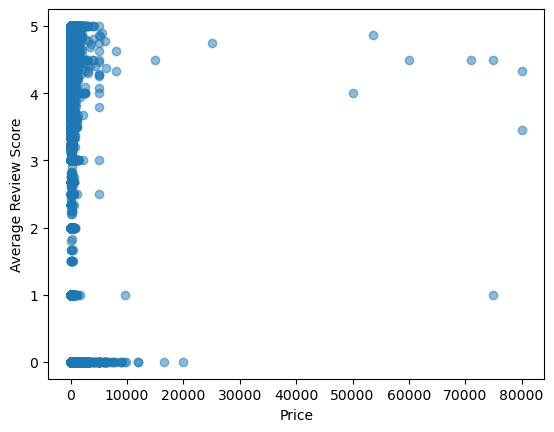

In [79]:
price = listings_df['price']
avg_review = listings_df['review_scores_value']
plt.scatter(price, avg_review, alpha = 0.5)
plt.xlabel('Price')
plt.ylabel('Average Review Score')
plt.show()

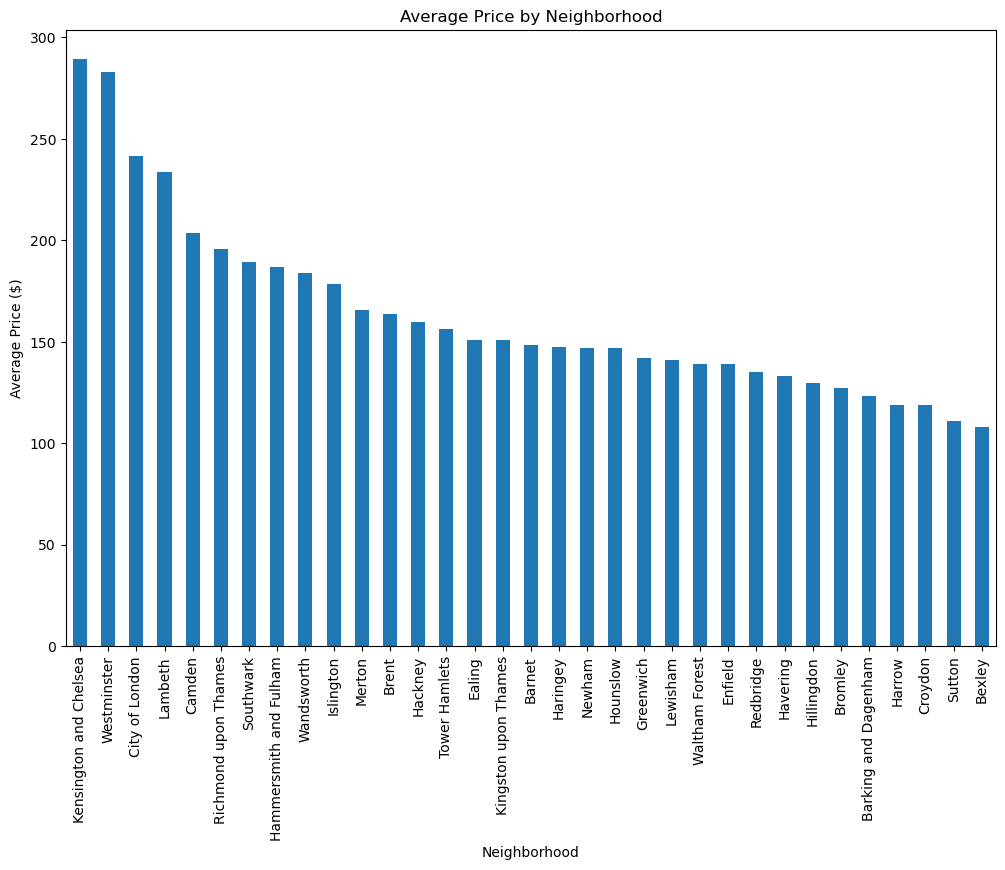

In [80]:
# Average price by neighborhood
avg_price_neighborhood = listings_df.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
avg_price_neighborhood.plot(kind='bar')
plt.title('Average Price by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=90)
plt.show()